# **Activity Detection**

Part 2

Data source: https://www.kaggle.com/datasets/luisomoreau/activity-detection

Our data consists of 12 folders, where each folder represents one activity. In each folder (except one), there are 12 CSV files with data. Each CSV file corresponds to one sensor that recorded the data. A description of the files with their values is provided below.

**Acceleration (Accelerometer)**
- Accelerometer_z: Acceleration along the Z-axis.
- Accelerometer_y: Acceleration along the Y-axis.
- Accelerometer_x: Acceleration along the X-axis.

**Annotation** - empty  


**Gravity**
- Gravity_z: Gravity vector component along the Z-axis.
- Gravity_y: Gravity vector component along the Y-axis.
- Gravity_x: Gravity vector component along the X-axis.

**Gyroscope**
- Gyroscope_z: Angular velocity around the Z-axis.
- Gyroscope_y: Angular velocity around the Y-axis.
- Gyroscope_x: Angular velocity around the X-axis.

**Location**
- Location_bearingAccuracy: Bearing (azimuth) accuracy in location.
- Location_speedAccuracy: Speed accuracy in location.
- Location_verticalAccuracy: Altitude accuracy in location.
- Location_horizontalAccuracy: Horizontal accuracy in location.
- Location_speed: Speed in location.
- Location_bearing: Bearing (azimuth) in location.
- Location_altitude: Altitude in location.
- Location_longitude: Longitude in location.
- Location_latitude: Latitude in location.

**Metadata** - additional data

**GPS (LocationGps)**
- LocationGps_bearingAccuracy: Bearing (azimuth) accuracy obtained from GPS.
- LocationGps_speedAccuracy: Speed accuracy obtained from GPS.
- LocationGps_verticalAccuracy: Altitude accuracy obtained from GPS.
- LocationGps_horizontalAccuracy: Horizontal accuracy obtained from GPS.
- LocationGps_speed: Speed obtained from GPS.
- LocationGps_bearing: Bearing (azimuth) obtained from GPS.
- LocationGps_altitude: Altitude obtained from GPS.
- LocationGps_longitude: Longitude obtained from GPS.
- LocationGps_latitude: Latitude obtained from GPS.

**Network Location (LocationNetwork)**
- LocationNetwork_bearingAccuracy: Bearing (azimuth) accuracy obtained from the network.
- LocationNetwork_speedAccuracy: Speed accuracy obtained from the network.
- LocationNetwork_verticalAccuracy: Altitude accuracy obtained from the network.
- LocationNetwork_horizontalAccuracy: Horizontal accuracy obtained from the network.
- LocationNetwork_speed: Speed obtained from the network.
- LocationNetwork_bearing: Bearing (azimuth) obtained from the network.
- LocationNetwork_altitude: Altitude obtained from the network.
- LocationNetwork_longitude: Longitude obtained from the network.
- LocationNetwork_latitude: Latitude obtained from the network.

**Magnetometer**
- Magnetometer_z: Magnetic field strength along the Z-axis.
- Magnetometer_y: Magnetic field strength along the Y-axis.
- Magnetometer_x: Magnetic field strength along the X-axis.

**Orientation**
- Orientation_qz: Z component of the quaternion representing orientation.
- Orientation_qy: Y component of the quaternion representing orientation.
- Orientation_qx: X component of the quaternion representing orientation.
- Orientation_qw: W component of the quaternion representing orientation.
- Orientation_roll: Roll angle of the orientation.
- Orientation_pitch: Pitch angle of the orientation.
- Orientation_yaw: Yaw angle of the orientation.

**Pedometer**
- Pedometer_steps: Number of steps recorded by the pedometer.

**Total Acceleration**
- TotalAcceleration_z: Total acceleration along the Z-axis.
- TotalAcceleration_y: Total acceleration along the Y-axis.
- TotalAcceleration_x: Total acceleration along the X-axis.

## **BUSINESS GOAL**

We work for a company that makes devices for athletes (like sports watches) that track physical activities. Using sensors, they collect data such as speed and location from each activity separately. The user doesn't select the type of activity - the smart system just knows when they start doing something. This way, we get a bunch of activities with different data points. We want to cluster these activities to figure out what kinds of activities our users prefer and when they do them. This can be used for more personalized ads or for classification problems.

## **EDA**

### Imports

In [3]:
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt   
import math
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score


warnings.filterwarnings("ignore")

### Reading prepared in part 1 csv file

In [4]:
result = pd.read_csv("..//final_data//result_data.csv")
Y_train = pd.read_csv("..//final_data//Y_train.csv")

# Y_train = pd.read_csv("..//final_data//Y_valid.csv") # for validation
# result = pd.read_csv("..//final_data//result_data_valid.csv") # for validation

# Y_train = pd.read_csv("..//final_data//Y_valid.csv") # for validation
# result = pd.read_csv("..//final_data//result_data_valid.csv") # for validation

### Some info about data frame

In [5]:
result

id  total_time    mean_speed     max_speed     min_speed  \
0        0.0    2.516545  1.945753e+00  9.355218e+00  0.000000e+00   
1        2.0    2.516605  3.189363e+00  6.976449e+00  6.043512e-02   
2        3.0    2.516626  8.628256e+00  1.777709e+01  6.976449e+00   
3        4.0    2.516632  1.808818e+01  1.858205e+01  1.777709e+01   
4        8.0    2.516498  2.172662e+01  2.387931e+01  1.837205e+01   
...      ...         ...           ...           ...           ...   
1357  2771.0    2.516920  1.027178e-21  2.562745e-21  5.165212e-24   
1358  2773.0    2.516907  5.407616e-28  1.093860e-27  5.110263e-30   
1359  2774.0    2.516899  9.276274e-31  5.110263e-30  1.783098e-33   
1360  2778.0    2.516874  9.794135e-43  3.944935e-42  0.000000e+00   
1361  2780.0    0.859112  0.000000e+00  0.000000e+00  0.000000e+00   

      total_distance  mean_acceleration  max_acceleration  min_acceleration  \
0           0.005250          11.015459         24.913852          1.732403   
1           0.001748           9.987097         19.097394          3.318487   
2           0.013083           9.768076         19.963122          2.882213   
3           0.015276           9.887447         15.586205          3.166203   
4           0.016061           9.841829         19.279124          4.524240   
...              ...                ...               ...               ...   
1357        0.000000           9.715216          9.977100          9.544482   
1358        0.000000           9.703497          9.920220          9.501199   
1359        0.000000           9.717226         10.134856          9.111182   
1360        0.000000           9.747030         12.981812          7.583295   
1361        0.000000          10.352763         13.589607          9.024704   

      sd_acceleration  ...  average_pitch  median_pitch  min_pitch  max_pitch  \
0            3.992875  ...       0.062942     -0.577149  -0.663856   1.382004   
1            2.310040  ...       0.570222      0.463072   0.257484   0.983648   
2            2.349455  ...       0.827762      0.831813   0.459423   1.219254   
3            2.411183  ...       0.861837      0.909612   0.505585   1.194841   
4            2.392057  ...       1.074759      1.156837   0.672223   1.221615   
...               ...  ...            ...           ...        ...        ...   
1357         0.057502  ...      -0.280858     -0.281333  -0.286740  -0.273078   
1358         0.076711  ...      -0.275386     -0.275647  -0.295679  -0.249763   
1359         0.096787  ...      -0.265641     -0.260294  -0.298774  -0.245418   
1360         0.482260  ...      -0.246482     -0.245037  -0.314204  -0.229960   
1361         0.747762  ...      -0.604976     -0.651176  -0.708414  -0.281792   

      sd_pitch  average_yaw  median_yaw   min_yaw   max_yaw    sd_yaw  
0     0.803340    -1.129064   -0.906096 -2.518292 -0.605325  0.466044  
1     0.243520     0.503290    0.510557  0.154463  0.976687  0.135715  
2     0.235169     0.791760    0.773080  0.573503  1.064444  0.108870  
3     0.201466     0.862720    0.846313  0.730423  1.069733  0.087143  
4     0.162367     1.097486    1.082139  0.880115  1.298065  0.131101  
...        ...          ...         ...       ...       ...       ...  
1357  0.002138     2.769453    2.768072  2.757857  2.796949  0.008251  
1358  0.009789     2.754753    2.752955  2.717815  2.791834  0.027663  
1359  0.013399     2.783523    2.790204  2.725673  2.810498  0.017086  
1360  0.008723     2.727584    2.732468  2.577463  2.743785  0.023602  
1361  0.103262     2.227272    2.289268  1.984317  2.425556  0.132824  

[1362 rows x 29 columns]

In [6]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1362 non-null   float64
 1   total_time         1362 non-null   float64
 2   mean_speed         1362 non-null   float64
 3   max_speed          1362 non-null   float64
 4   min_speed          1362 non-null   float64
 5   total_distance     1362 non-null   float64
 6   mean_acceleration  1362 non-null   float64
 7   max_acceleration   1362 non-null   float64
 8   min_acceleration   1362 non-null   float64
 9   sd_acceleration    1362 non-null   float64
 10  mean_gyroscope     1362 non-null   float64
 11  mean_magnetometer  1362 non-null   float64
 12  steps_per_minute   1362 non-null   float64
 13  total_steps        1362 non-null   float64
 14  average_roll       1362 non-null   float64
 15  median_roll        1362 non-null   float64
 16  min_roll           1362 

### Histograms for every column

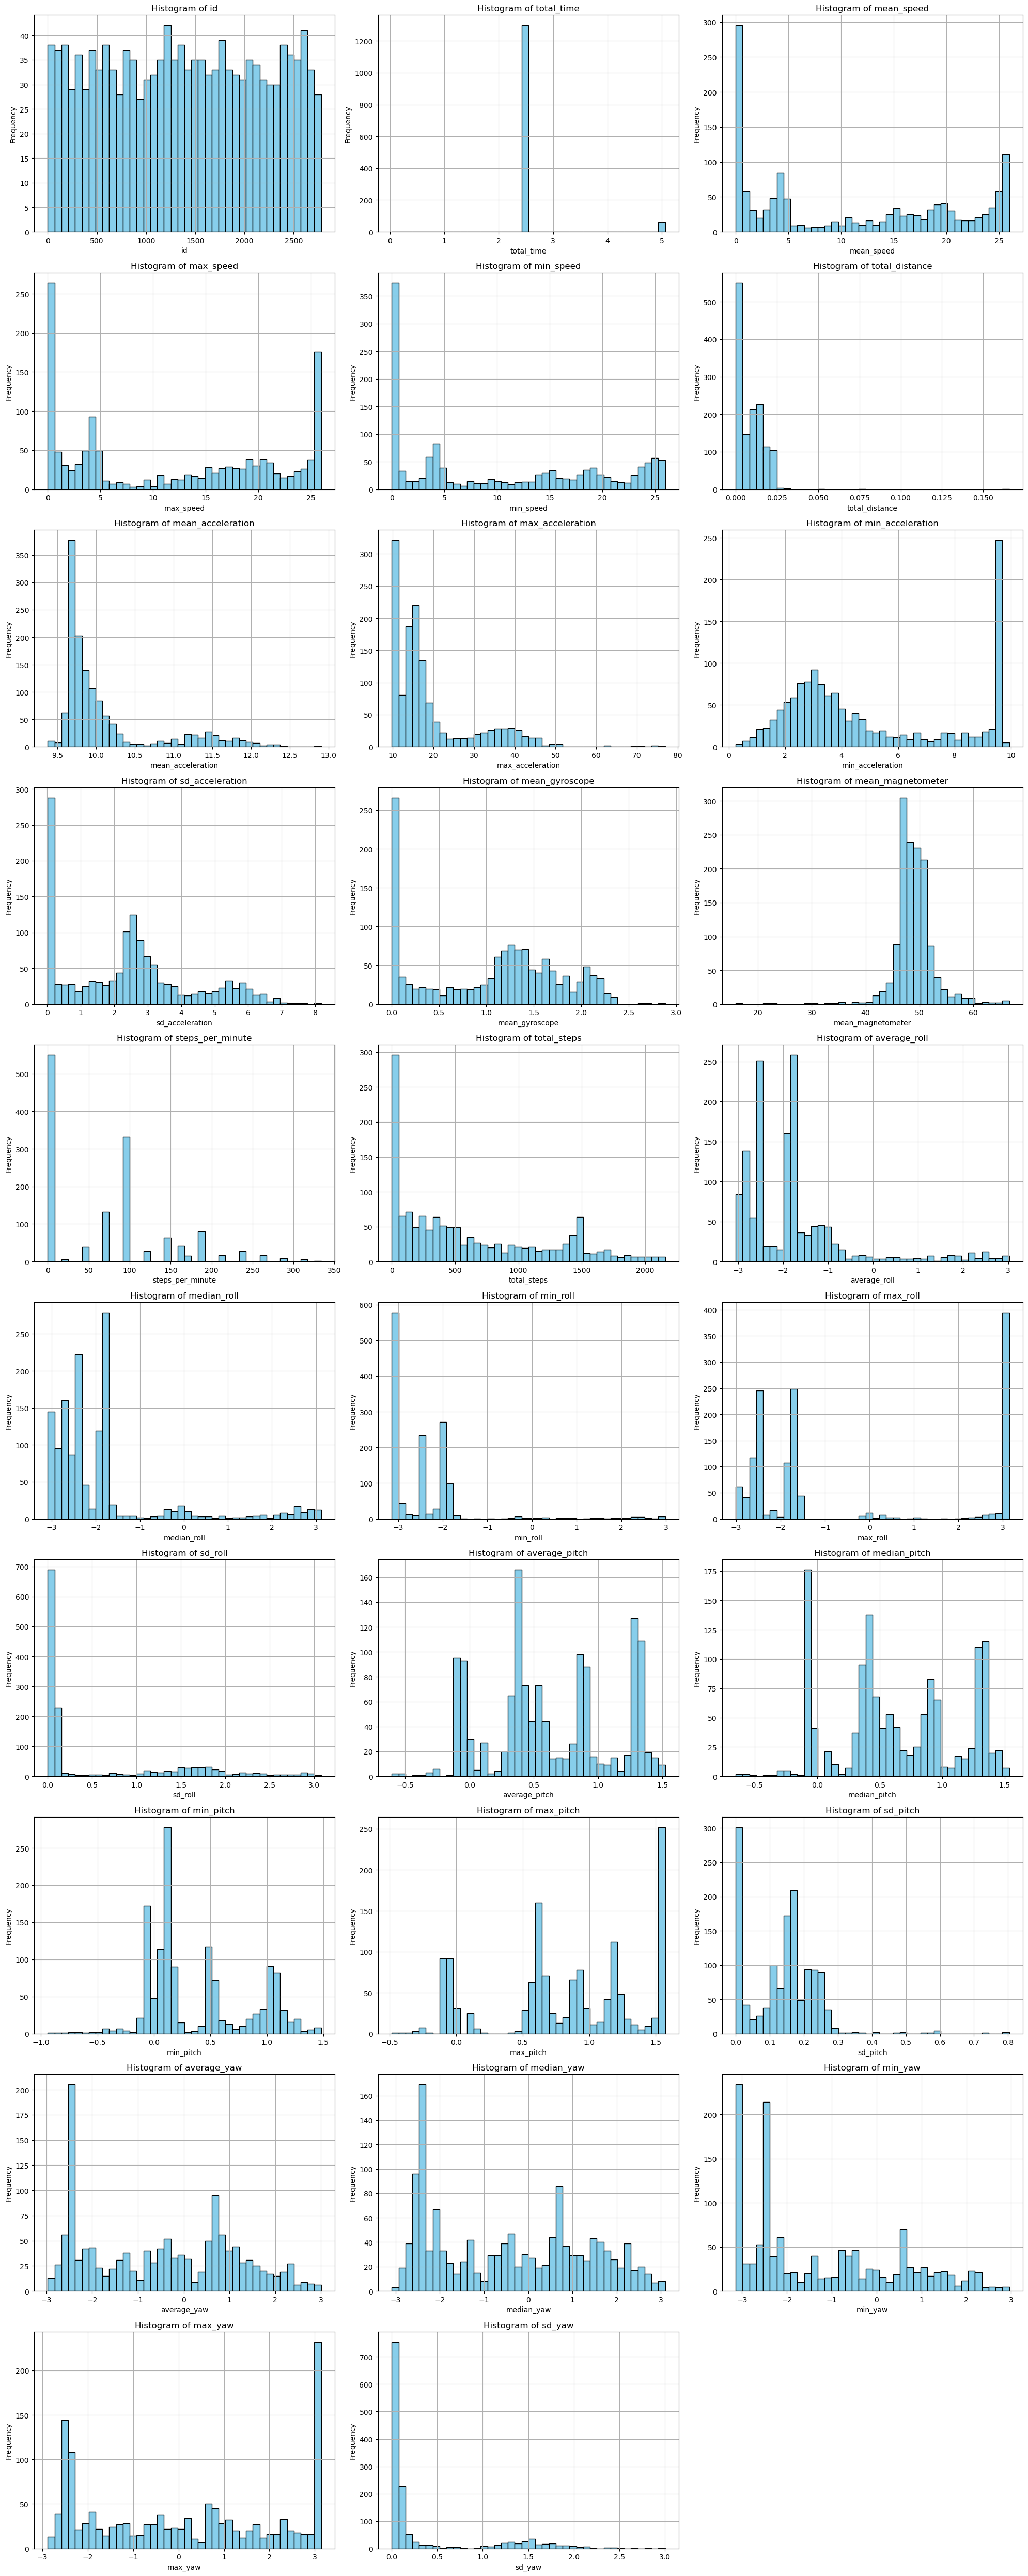

In [7]:
num_columns = len(result.columns)
num_rows = (num_columns + 2) // 3  

fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))
axes = axes.flatten()  

for i, column in enumerate(result.columns):
    axes[i].hist(result[column], bins=40, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print()
print()


### Heatmap of correlation

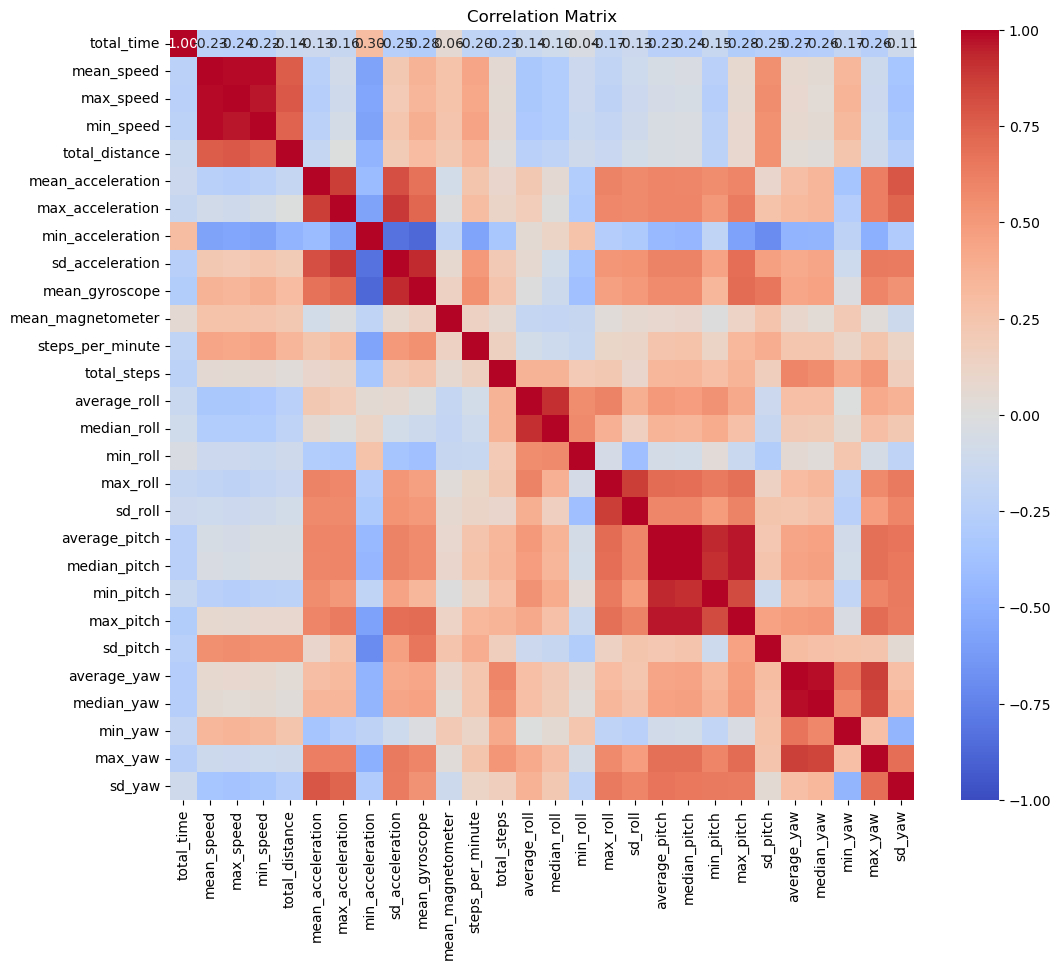

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(result.loc[:,result.columns != 'id'].corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


### Dropping correlated columns

In [9]:
reduced_result = result.drop(columns=['sd_yaw', 'min_speed', 'total_steps', 'max_speed', 'min_pitch', 'total_distance', 'median_roll', 'max_yaw', 'median_yaw', 'average_yaw', 'sd_pitch', 'max_pitch', 'average_pitch', 'max_acceleration', 'min_acceleration', 'mean_gyroscope', 'max_roll', 'min_roll'])

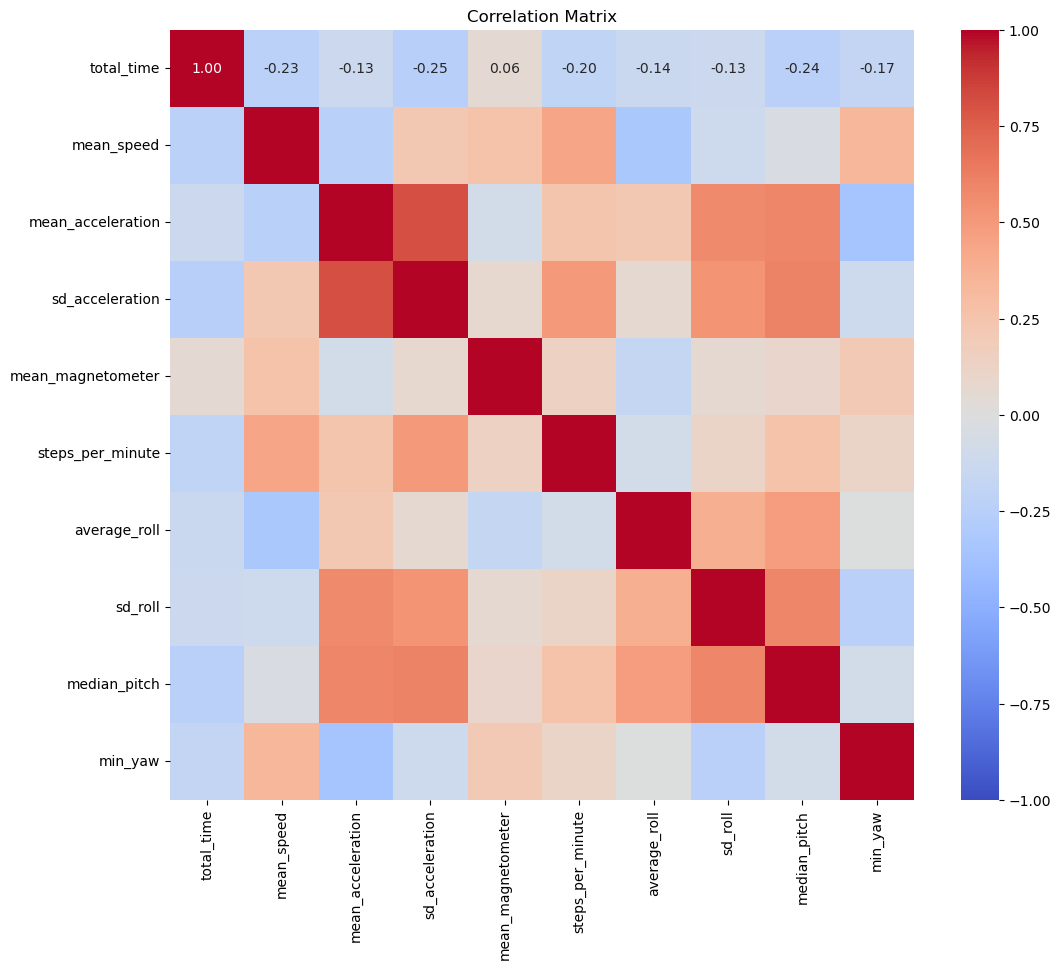

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(reduced_result.loc[:, reduced_result.columns != 'id'].corr(), 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            center=0, 
            vmin=-1, 
            vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Boxplots for every column

In [11]:
def plot_boxplots(df):
    num_cols = len(df.columns)
    
    num_rows = (num_cols + 2) // 3  # Round up to the nearest integer
    
    plt.figure(figsize=(15, 5 * num_rows))
    
    for i, col in enumerate(df.columns):
        plt.subplot(num_rows, 3, i + 1)
        plt.boxplot(df[col])
        plt.title(col)
    
    plt.tight_layout()
    plt.show()

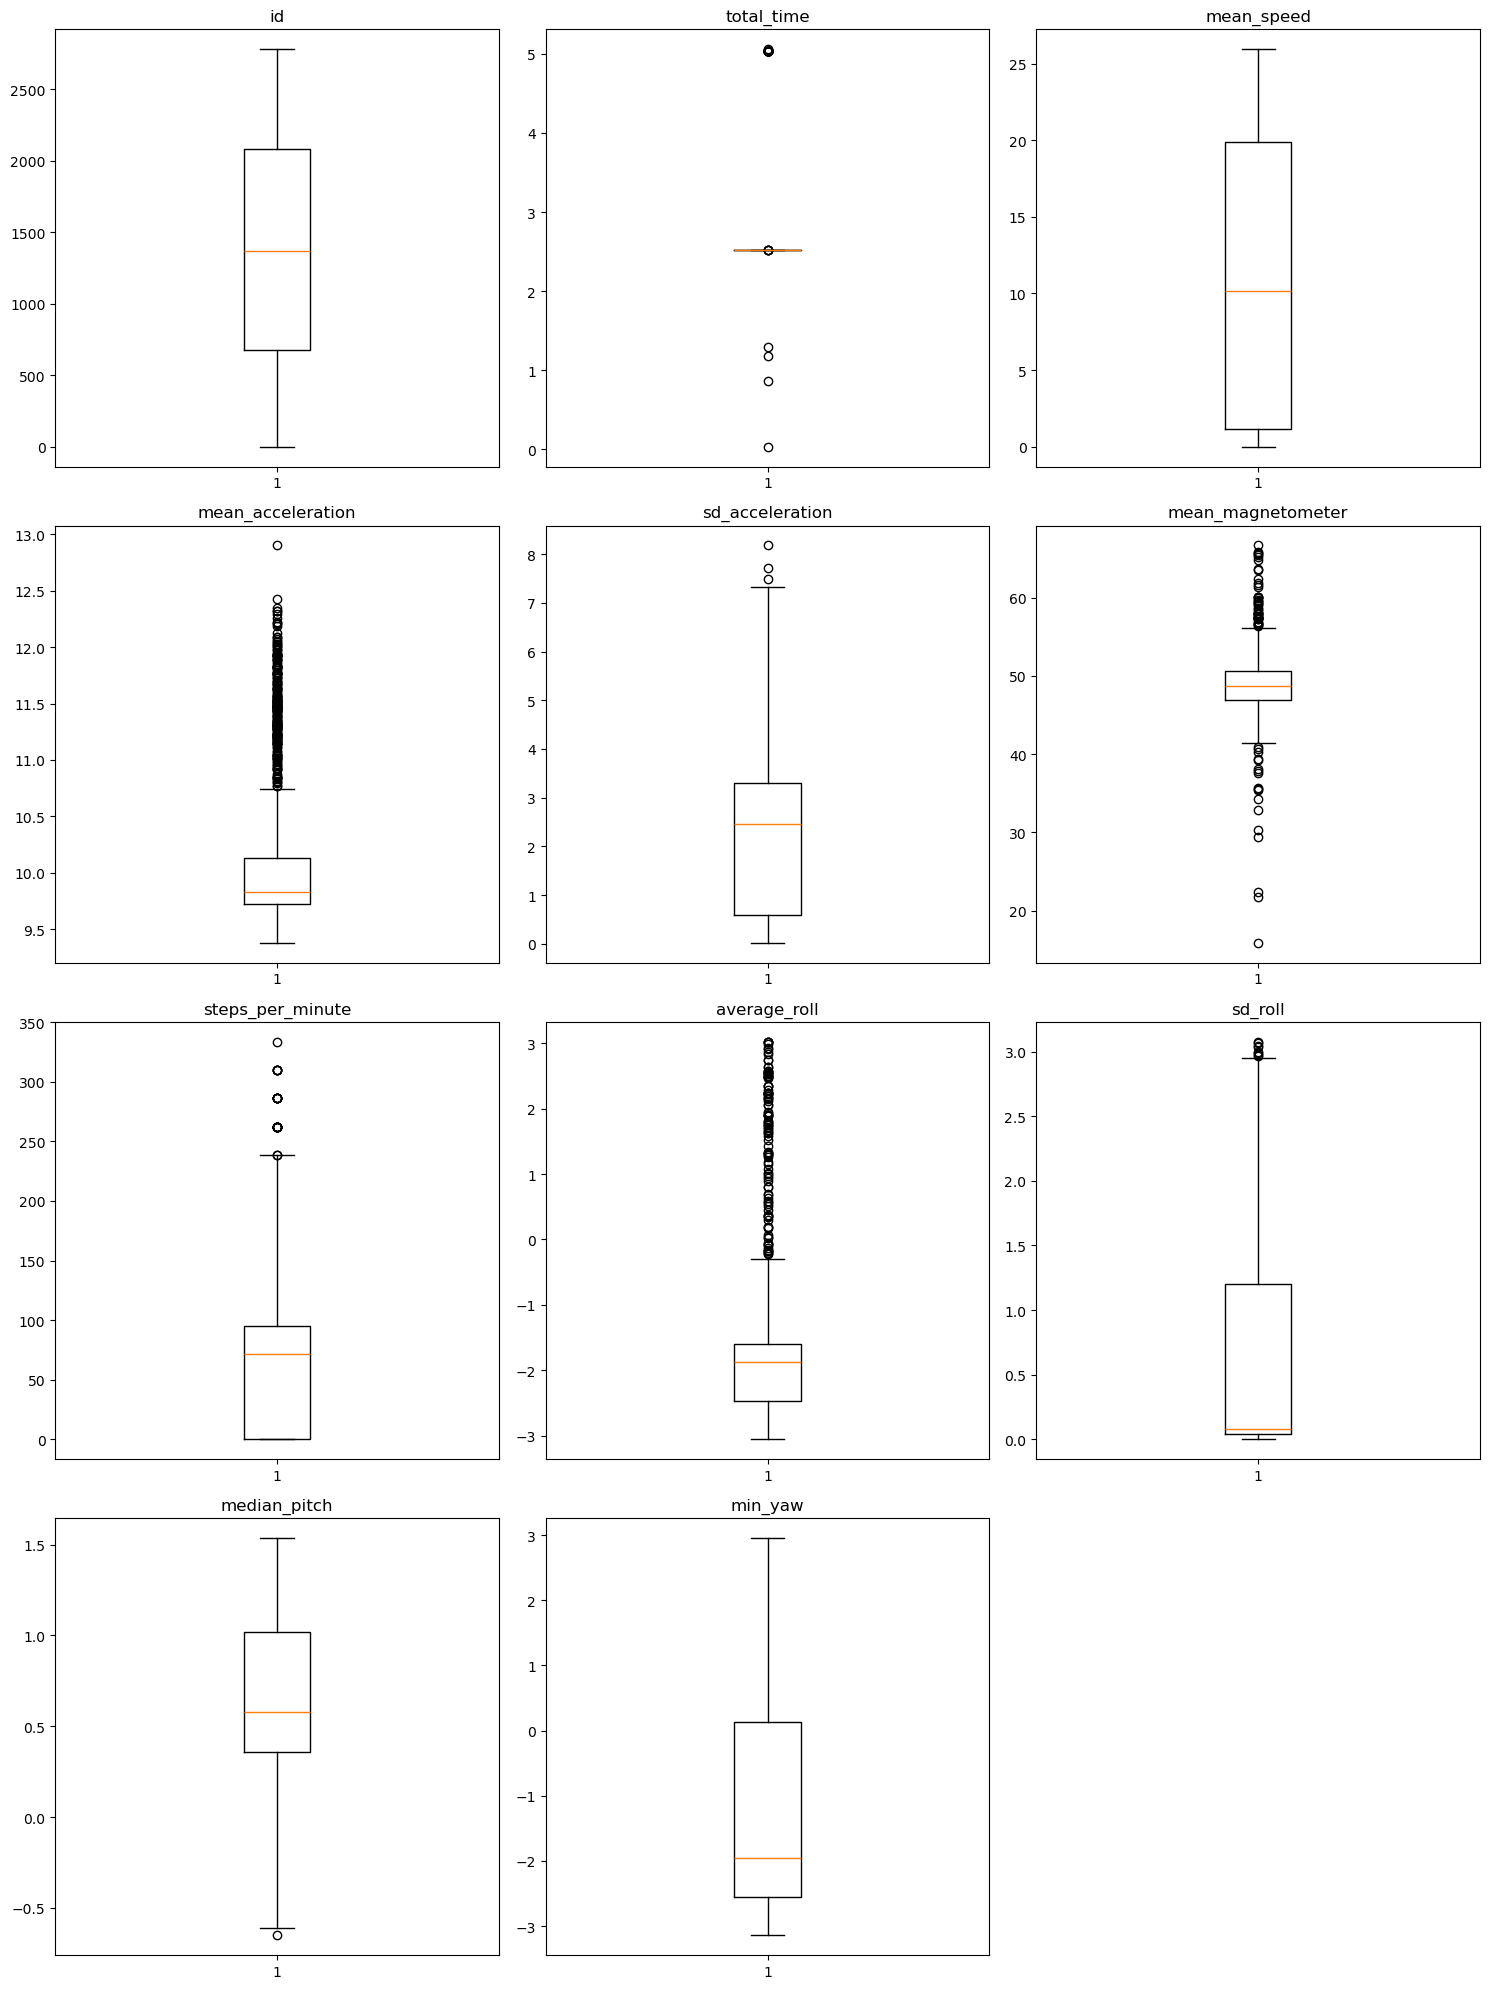

In [12]:
plot_boxplots(reduced_result)

We need to modify outliers in total_time and mean_magnetometer.

In [13]:
def replace_outliers_with_quantile(df):
    time_quantile = df['total_time'].quantile(0.95)
    magneto_quantile = df['mean_magnetometer'].quantile(0.95)
    
    df.loc[df['total_time'] > time_quantile, 'total_time'] = time_quantile
    
    df.loc[df['mean_magnetometer'] > magneto_quantile, 'mean_magnetometer'] = magneto_quantile
    
    return df

In [14]:
replace_outliers_with_quantile(reduced_result)

id  total_time    mean_speed  mean_acceleration  sd_acceleration  \
0        0.0    2.516545  1.945753e+00          11.015459         3.992875   
1        2.0    2.516605  3.189363e+00           9.987097         2.310040   
2        3.0    2.516626  8.628256e+00           9.768076         2.349455   
3        4.0    2.516632  1.808818e+01           9.887447         2.411183   
4        8.0    2.516498  2.172662e+01           9.841829         2.392057   
...      ...         ...           ...                ...              ...   
1357  2771.0    2.516920  1.027178e-21           9.715216         0.057502   
1358  2773.0    2.516907  5.407616e-28           9.703497         0.076711   
1359  2774.0    2.516899  9.276274e-31           9.717226         0.096787   
1360  2778.0    2.516874  9.794135e-43           9.747030         0.482260   
1361  2780.0    0.859112  0.000000e+00          10.352763         0.747762   

      mean_magnetometer  steps_per_minute  average_roll   sd_roll  \
0             44.985078        238.422122     -0.644303  0.701319   
1             50.703331          0.000000     -2.496963  0.157744   
2             54.372147          0.000000     -2.708276  0.140021   
3             54.372147         47.682776     -2.761200  0.115934   
4             54.372147          0.000000     -1.040673  2.811269   
...                 ...               ...           ...       ...   
1357          47.155027          0.000000     -2.781184  0.010093   
1358          47.205661          0.000000     -2.805104  0.030056   
1359          47.345006          0.000000     -2.792382  0.016608   
1360          47.180419          0.000000     -2.711286  0.013943   
1361          47.325072          0.000000     -0.134196  0.051130   

      median_pitch   min_yaw  
0        -0.577149 -2.518292  
1         0.463072  0.154463  
2         0.831813  0.573503  
3         0.909612  0.730423  
4         1.156837  0.880115  
...            ...       ...  
1357     -0.281333  2.757857  
1358     -0.275647  2.717815  
1359     -0.260294  2.725673  
1360     -0.245037  2.577463  
1361     -0.651176  1.984317  

[1362 rows x 11 columns]

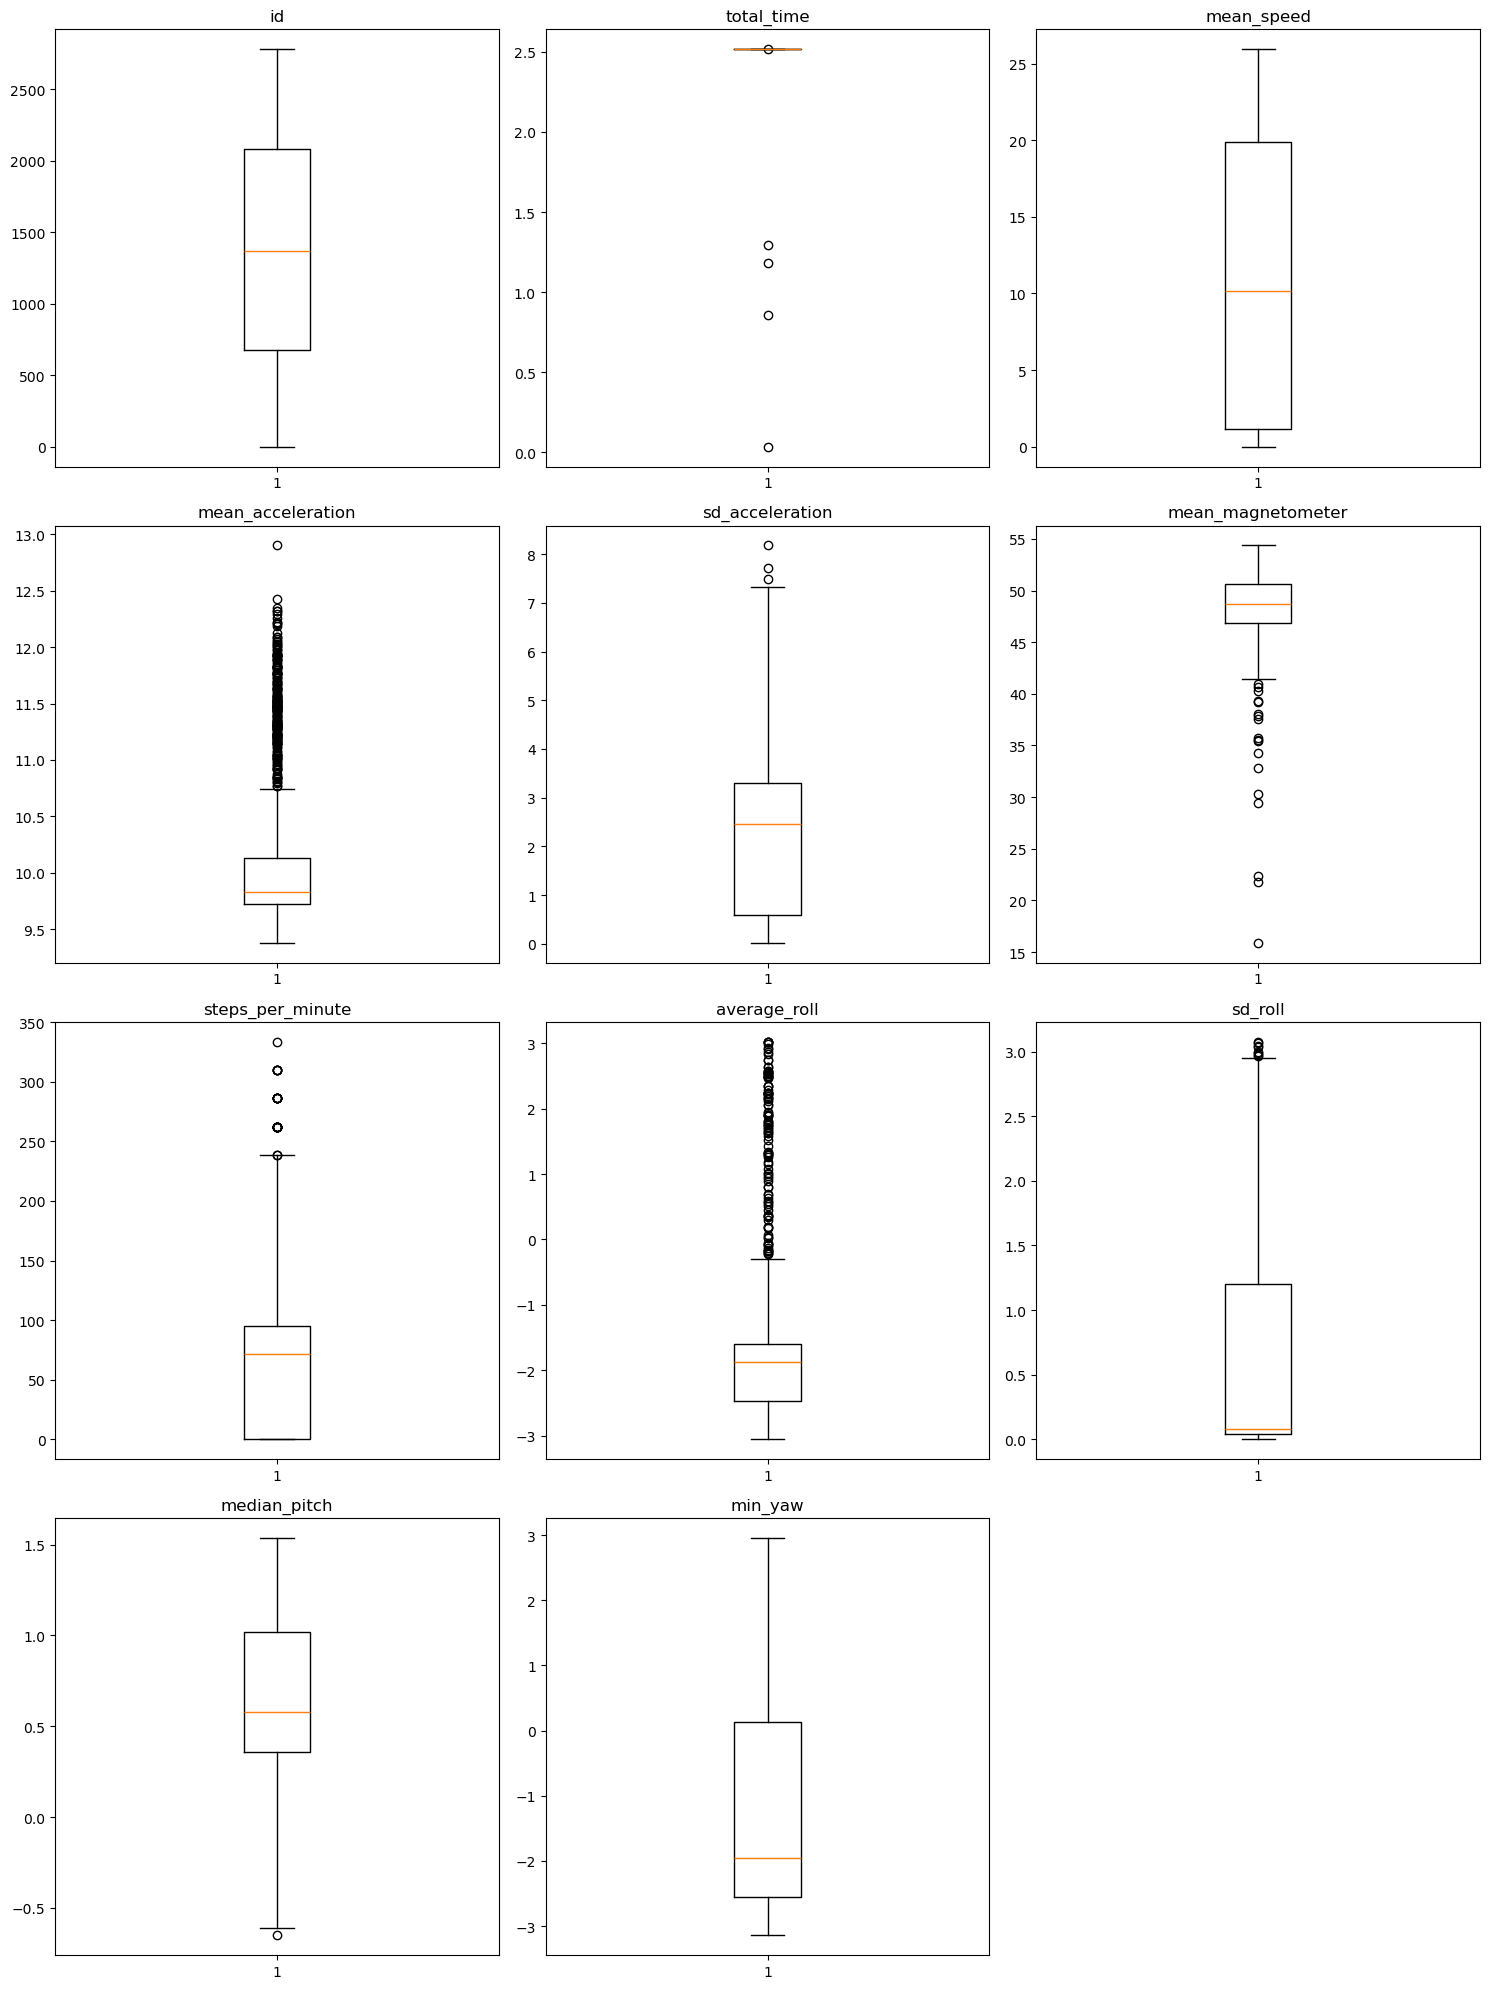

In [15]:
plot_boxplots(reduced_result)

We don't want to analyze activities shorter than 1 second, so we will remove them from the dataset.

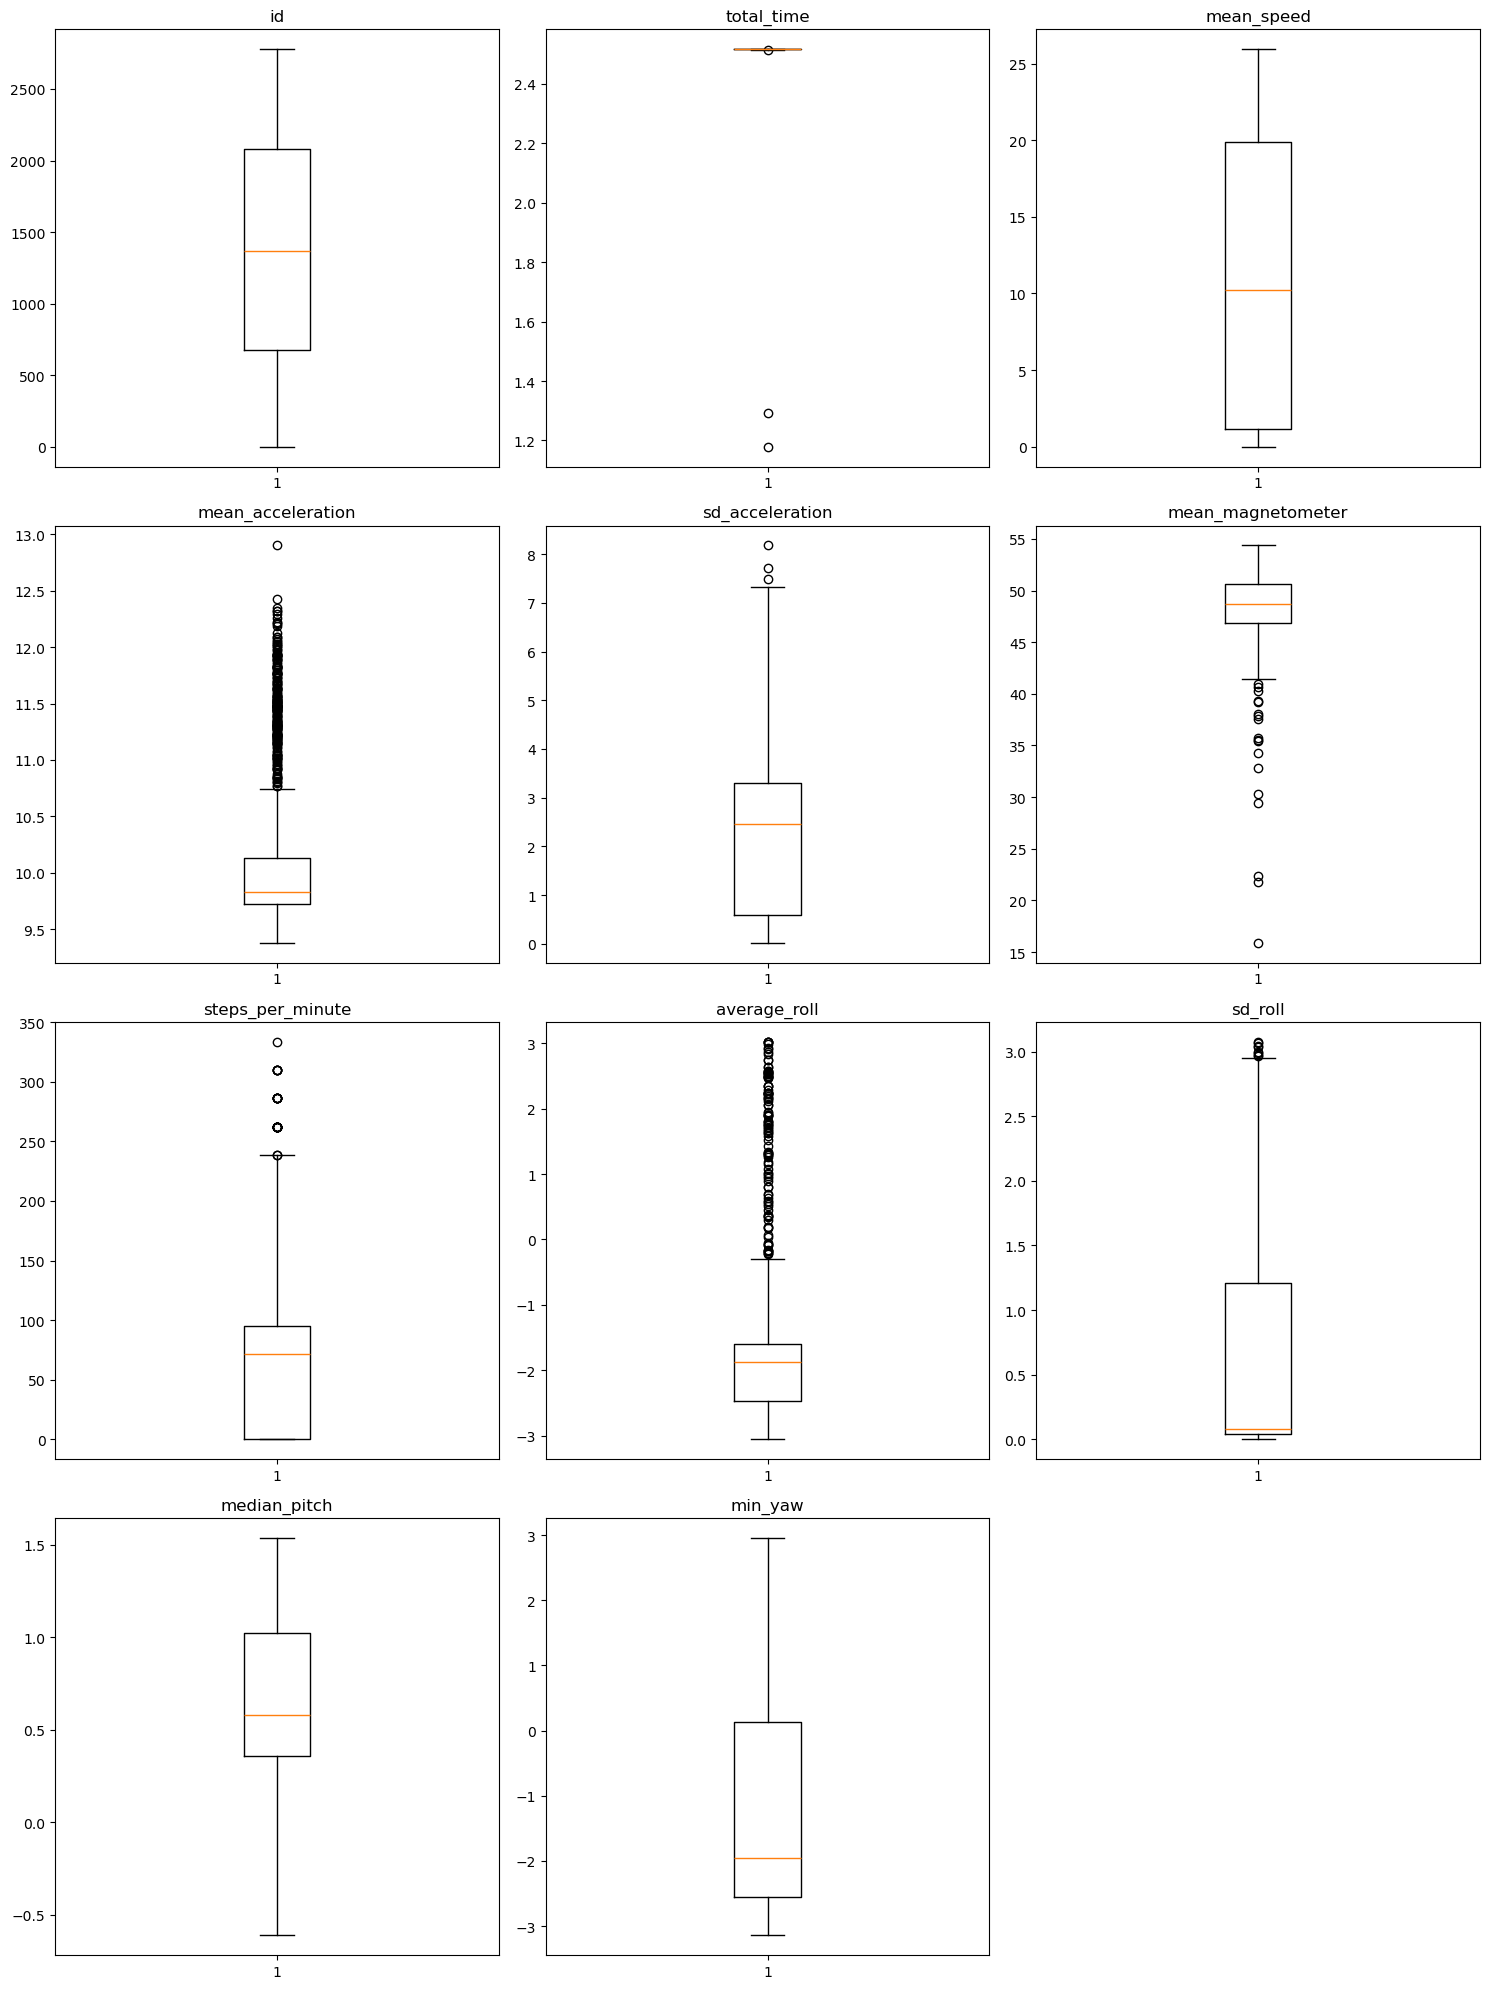

In [16]:
time_min = 1
Y_train.drop(reduced_result[reduced_result['total_time'] < time_min].index, inplace=True)
reduced_result.drop(reduced_result[reduced_result['total_time'] < time_min].index, inplace=True)

plot_boxplots(reduced_result)


## **Models**

Real labels from dataset.

In [17]:
real_labels = Y_train['act_type']


We can now drop id from our data frame.

In [18]:
reduced_result.drop(columns=['id'], inplace=True)

### Elbow method

Number of clusters: 2, Inertia: 2576152.4304407802
Number of clusters: 3, Inertia: 749717.513345649
Number of clusters: 4, Inertia: 405150.17964243406
Number of clusters: 5, Inertia: 288241.6994261139
Number of clusters: 6, Inertia: 203320.7210953908
Number of clusters: 7, Inertia: 175681.78575909886
Number of clusters: 8, Inertia: 149999.98295105566
Number of clusters: 9, Inertia: 124858.84296871137
Number of clusters: 10, Inertia: 105651.66851867236


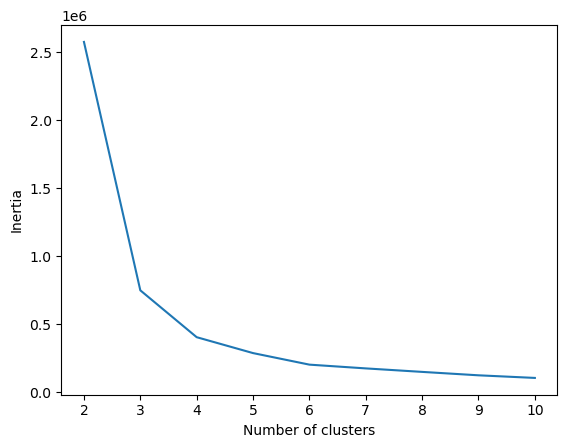

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(reduced_result)
    labels = kmeans.predict(reduced_result)
    print(f'Number of clusters: {i}, Inertia: {kmeans.inertia_}')
    inertias.append(kmeans.inertia_)
    
plt.plot(range(2, 11), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


### Silhouette score

In [20]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k,random_state=42)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

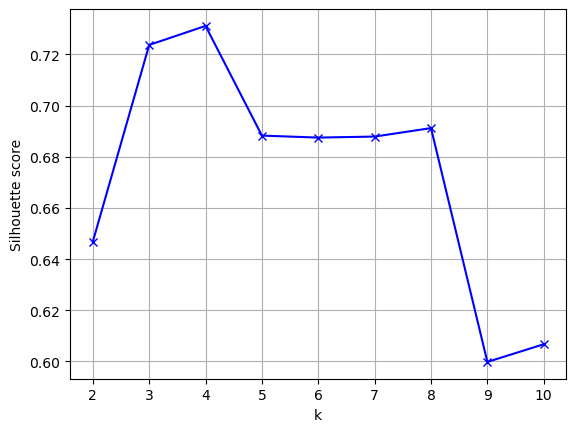

In [21]:
cluster_num_seq = range(2, 11)
silhouette_vec = count_clustering_scores(reduced_result, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.xticks(cluster_num_seq)
plt.grid(True)
plt.show()

### Davies-Bouldin score

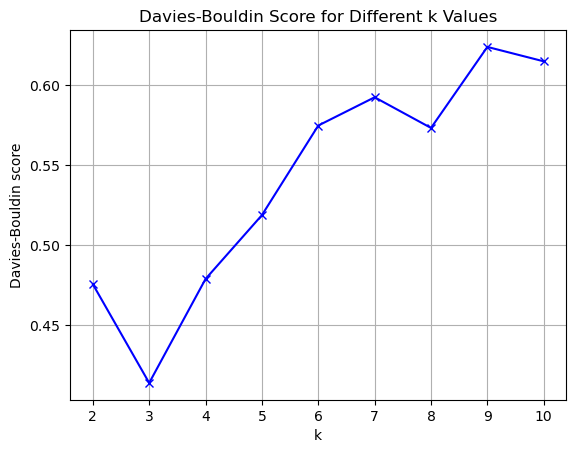

In [22]:
cluster_num_seq = range(2, 11)
#davies_bouldin_vec = count_clustering_scores(df, cluster_num_seq, KMeans, davies_bouldin_score)

davies_bouldin_vec = []
for k in cluster_num_seq:
    kmeans = KMeans(n_clusters=k,random_state=42)
    davies_bouldin_vec.append(davies_bouldin_score(reduced_result, kmeans.fit_predict(reduced_result)))


plt.plot(cluster_num_seq, davies_bouldin_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin Score for Different k Values')
plt.xticks(cluster_num_seq)
plt.grid(True)
plt.show()

### Caliński-Harabasz score

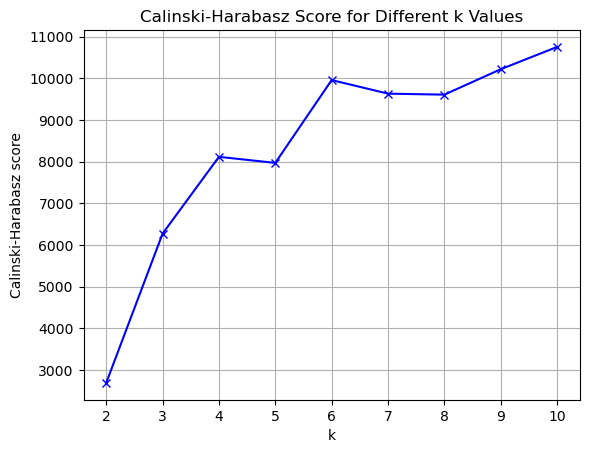

In [23]:
cluster_num_seq = range(2, 11)

calinski_harabasz_vec = count_clustering_scores(reduced_result, cluster_num_seq, KMeans, calinski_harabasz_score)

plt.plot(cluster_num_seq, calinski_harabasz_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz score')
plt.title('Calinski-Harabasz Score for Different k Values')
plt.xticks(cluster_num_seq)
plt.grid(True)
plt.show()

We set n_clusters = 3

In [24]:
n_clusters = 3

In [25]:
real_color_labels = ['yellow' if real_labels.iloc[i] == 0 else 'blue' if real_labels.iloc[i] == 1 else 'green' for i in range(len(real_labels))]
real_color_labels

['yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',

### Function to do KMeans clustering

In [26]:
from sklearn import metrics
def doKmeans(X, nclust=n_clusters, xaxis = 2, yaxis = 6, real = False,  multidimensional = False, zaxis = 4):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X).flatten()
    centers = model.cluster_centers_
    
    color_labels = ['yellow' if clust_labels[i] == 0 else 'blue' if clust_labels[i] == 1 else 'green' for i in range(len(clust_labels))]
    
    print(f"Model inertia: {model.inertia_}")
    print("Accuracy: ", np.mean(real_labels == clust_labels))
    print("Silhouette coefficient:" , silhouette_score(X, clust_labels))
    print("Davies Bouldin Score:" , davies_bouldin_score(X, clust_labels))
    print("Calinski Harabasz Score:" , calinski_harabasz_score(X, clust_labels))
    print()
    
    
    
    # i = 0
    # for label in real_labels:
    #     if label == 0:
    #         plt.scatter(X.iloc[i, 0], X.iloc[i, 1], marker='o', c=color_labels[i], s=50)
    #     elif label == 1:
    #         plt.scatter(X.iloc[i, 0], X.iloc[i, 1], marker='s', c=color_labels[i], s=50)
    #     elif label == 2:
    #         plt.scatter(X.iloc[i, 0], X.iloc[i, 1], marker='^', c=color_labels[i], s=50)
    #     i += 1
    
        
    plt.scatter(X.iloc[:, xaxis], X.iloc[:, yaxis], marker='o', c=color_labels, s=50, cmap='viridis')

    plt.scatter(centers[:, xaxis], centers[:, yaxis], c='red', s=200, alpha=0.75, marker='X')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-means Clustering with Centroids')
    plt.show()
    
    if real:
        plt.scatter(X.iloc[:, xaxis], X.iloc[:, yaxis], marker='o', c=real_color_labels, s=50, cmap='viridis')

        plt.scatter(centers[:, xaxis], centers[:, yaxis], c='red', s=200, alpha=0.75, marker='X')

        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('K-means Clustering with Centroids')
        plt.show()
        
    if multidimensional:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Scatter plot for data points
        ax.scatter(X.iloc[:, xaxis], X.iloc[:, yaxis], X.iloc[:, zaxis], c=color_labels, s=50, cmap='viridis')

        # Scatter plot for centroids
        ax.scatter(centers[:, xaxis], centers[:, yaxis], centers[:, zaxis], c='red', s=200, alpha=0.75, marker='X')

        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Feature 3')
        ax.set_title('K-means Clustering with Centroids')

        plt.show()
        
    if multidimensional & real:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Scatter plot for data points
        ax.scatter(X.iloc[:, xaxis], X.iloc[:, yaxis], X.iloc[:, zaxis], c=real_color_labels, s=50, cmap='viridis')

        # Scatter plot for centroids
        ax.scatter(centers[:, xaxis], centers[:, yaxis], centers[:, zaxis], c='red', s=200, alpha=0.75, marker='X')

        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Feature 3')
        ax.set_title('K-means Clustering with Centroids')

        plt.show()

    return clust_labels

### Tests

Basic

Model inertia: 749717.513345649
Accuracy:  0.4213235294117647
Silhouette coefficient: 0.7237226985302461
Davies Bouldin Score: 0.41407258839212896
Calinski Harabasz Score: 6272.806304198306



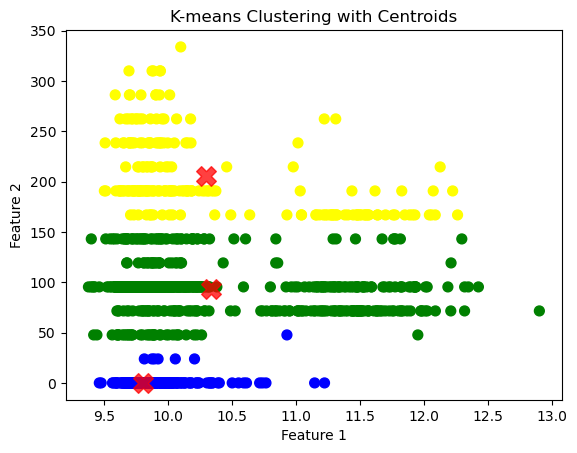

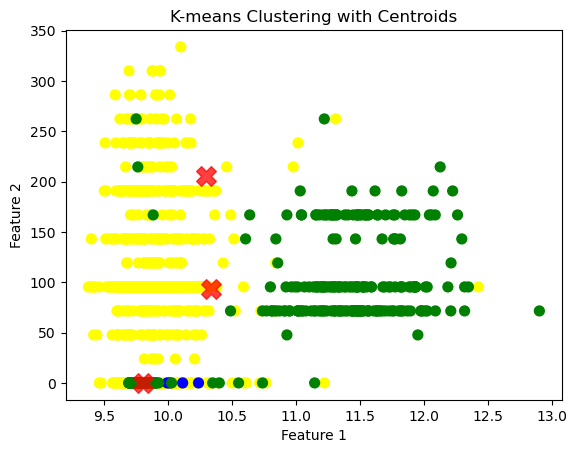

In [27]:
x = reduced_result.copy()
clust_labels = doKmeans(x, n_clusters, 2, 5, True)


Standarization

Model inertia: 7811.293686334608
Accuracy:  0.8323529411764706
Silhouette coefficient: 0.36024344786625667
Davies Bouldin Score: 1.2383187439463854
Calinski Harabasz Score: 502.8152046943441



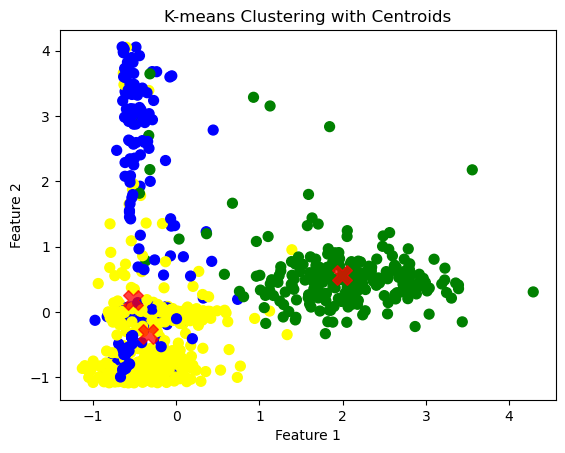

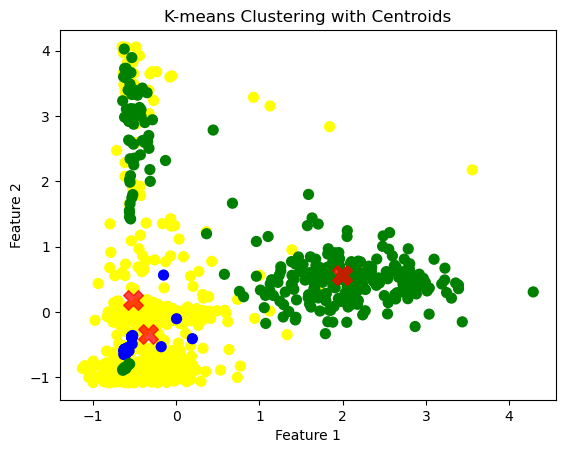

In [28]:
x = reduced_result.copy()
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x, columns=reduced_result.columns)
clust_labels = doKmeans(x, n_clusters, 2, 6, True)


Normalization

Model inertia: 24.857167893489656
Accuracy:  0.5029411764705882
Silhouette coefficient: 0.639863110146599
Davies Bouldin Score: 0.5424961888496818
Calinski Harabasz Score: 10122.73316817784



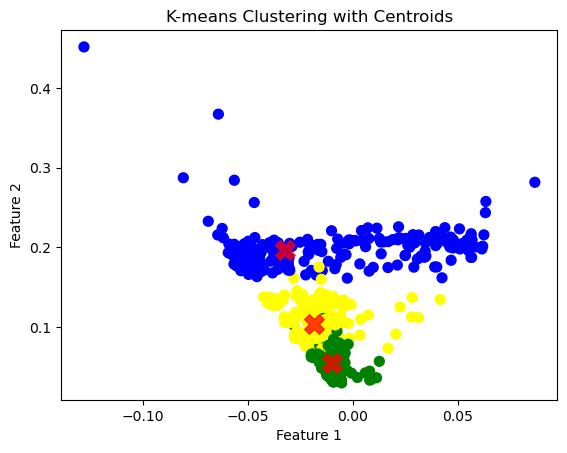

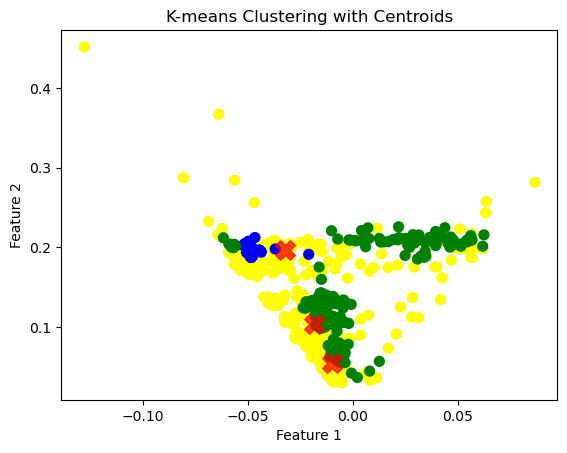

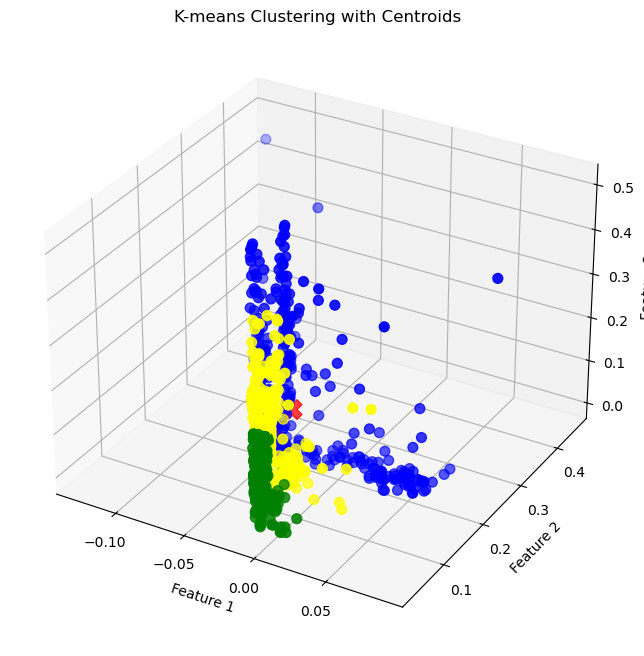

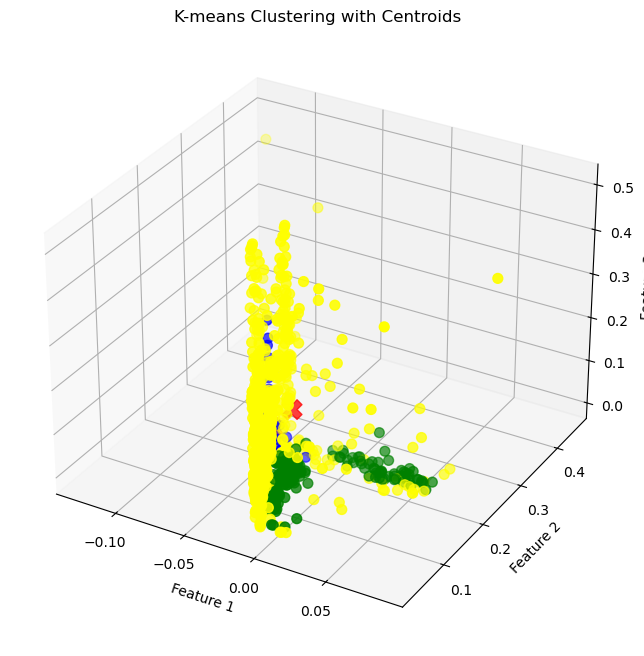

In [29]:
x = reduced_result.copy()
normalizer = Normalizer()
x = normalizer.fit_transform(x)
x = pd.DataFrame(x, columns=reduced_result.columns)
clust_labels_norm = doKmeans(x, n_clusters, 6, 2, True, True, 1)

Normalization + standarization

Model inertia: 703.4424959449678
Accuracy:  0.29044117647058826
Silhouette coefficient: 0.3651824265605564
Davies Bouldin Score: 1.2058430947937426
Calinski Harabasz Score: 613.4284983092355



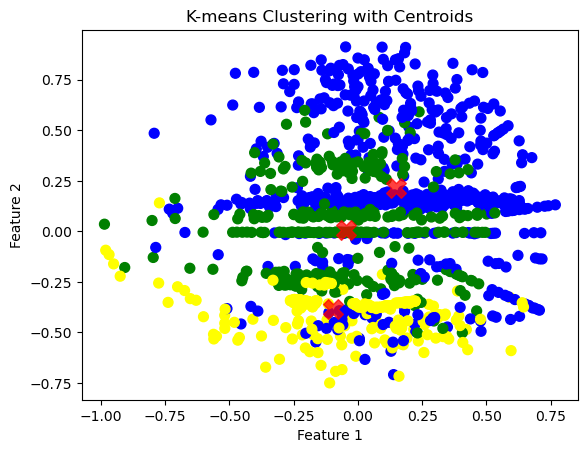

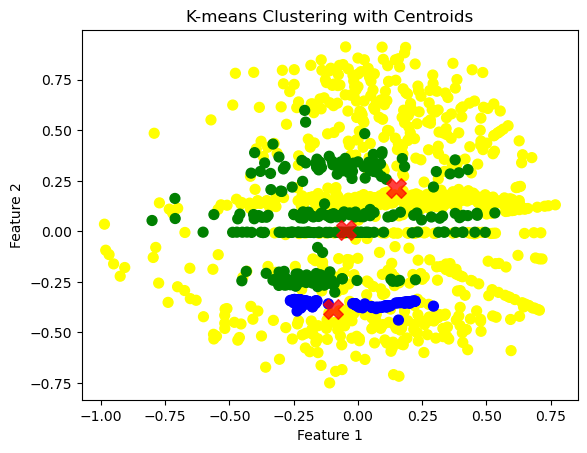

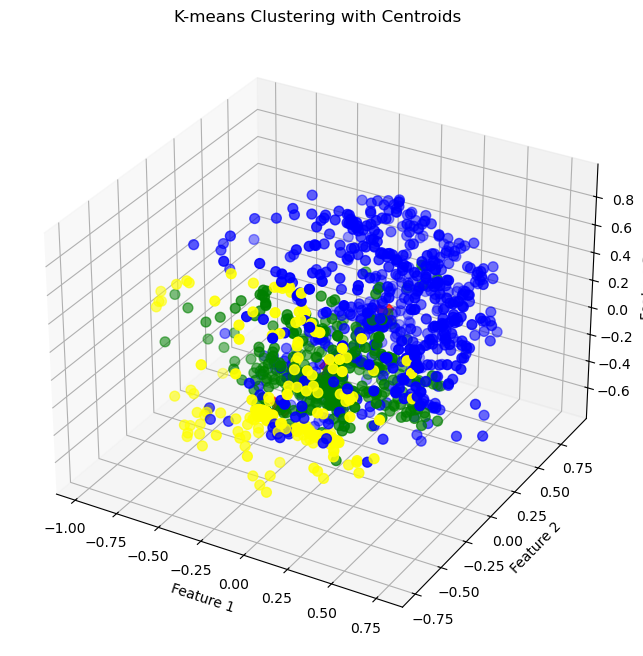

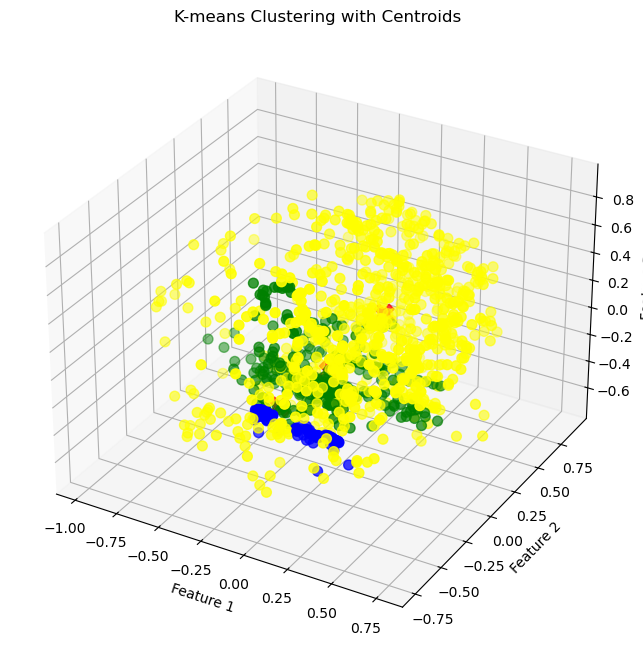

In [30]:
x = reduced_result.copy()
normalizer = Normalizer()
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = normalizer.fit_transform(x)
x = pd.DataFrame(x, columns=reduced_result.columns)
clust_labels = doKmeans(x, n_clusters, 4, 5, True, True, 9)

PowerTransformer

Model inertia: 6679.787787584969
Accuracy:  0.0625
Silhouette coefficient: 0.3815929181356006
Davies Bouldin Score: 1.1451316362364923
Calinski Harabasz Score: 564.7790178507379



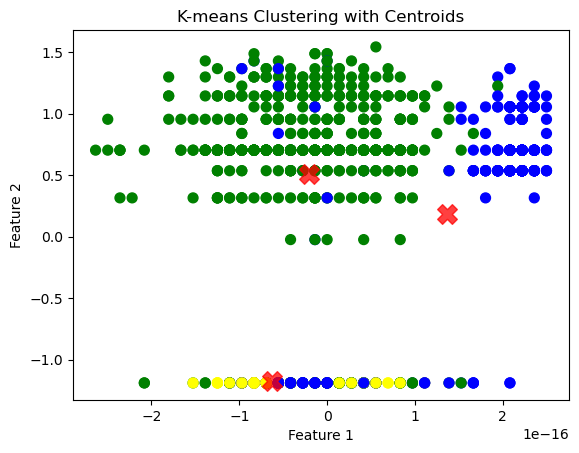

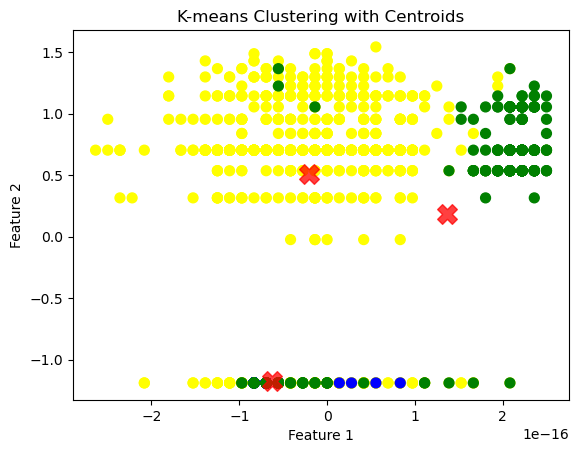

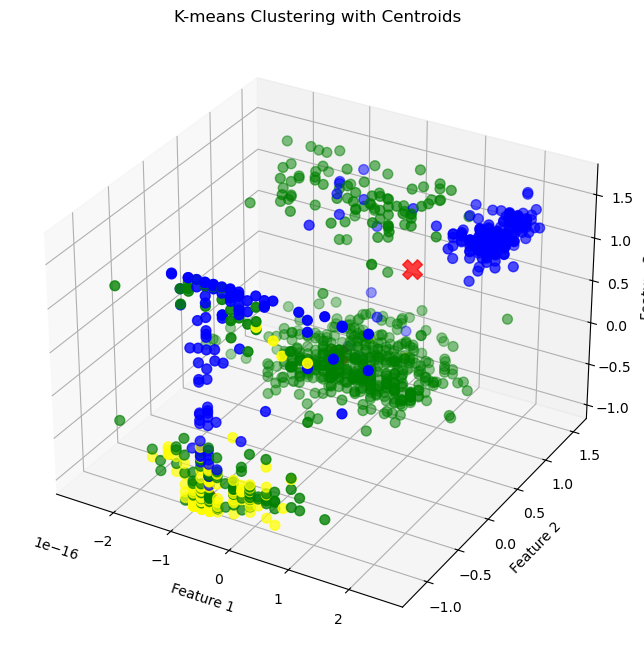

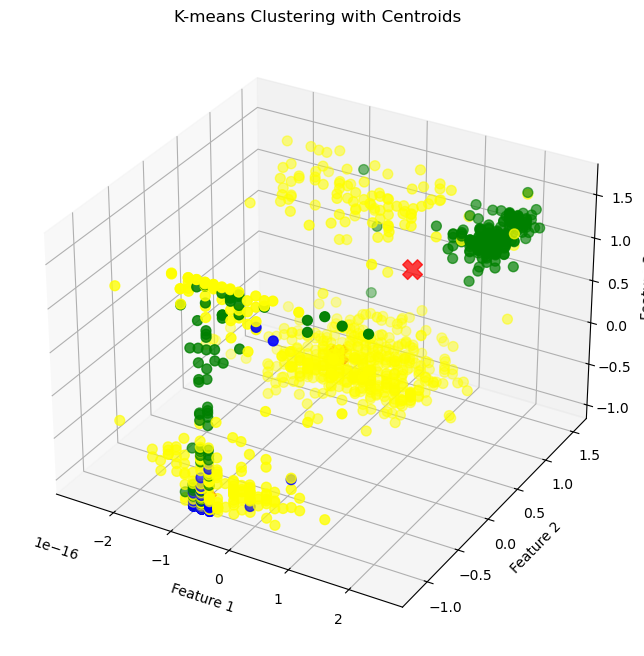

In [31]:
x = reduced_result.copy()
powerTransformer = PowerTransformer()
x = powerTransformer.fit_transform(x)
x = pd.DataFrame(x, columns=reduced_result.columns)
clust_labels = doKmeans(x, n_clusters, 2, 5, True, True, 7)

### PCA

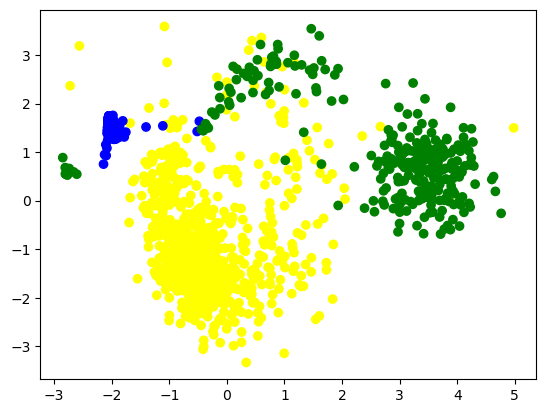

Model inertia: 553.4874247205012
Accuracy:  0.06102941176470588
Silhouette coefficient: 0.616095471884821
Davies Bouldin Score: 0.5174044331963245
Calinski Harabasz Score: 2655.848564345338



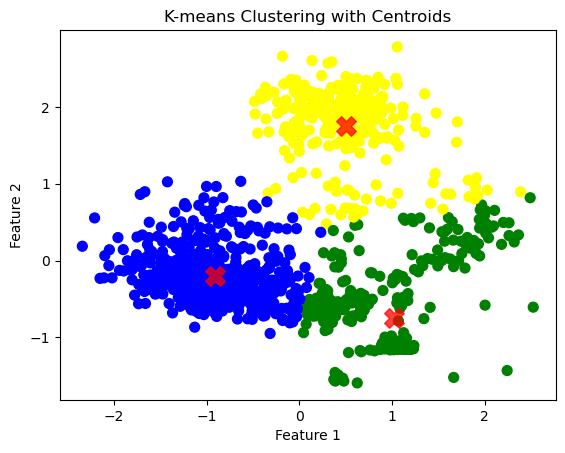

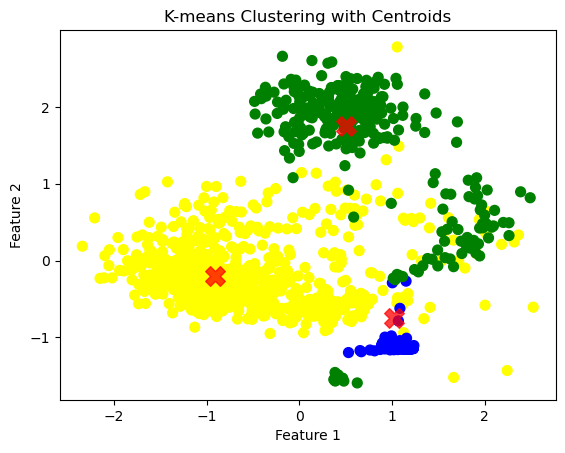

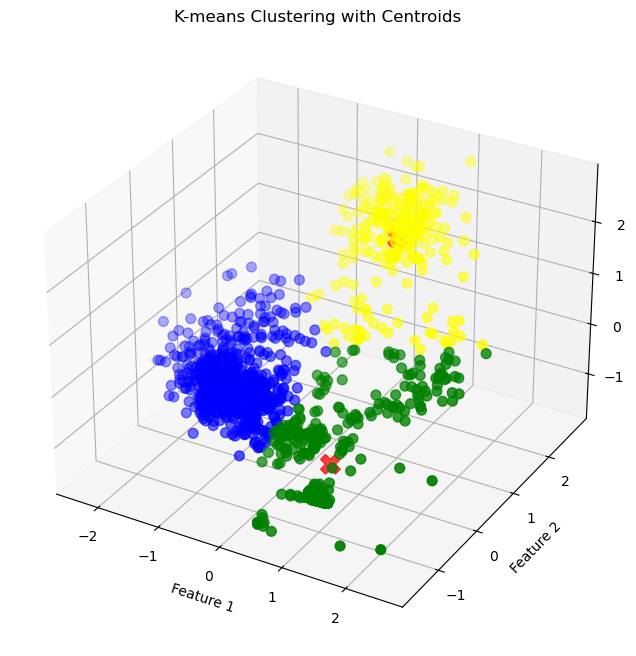

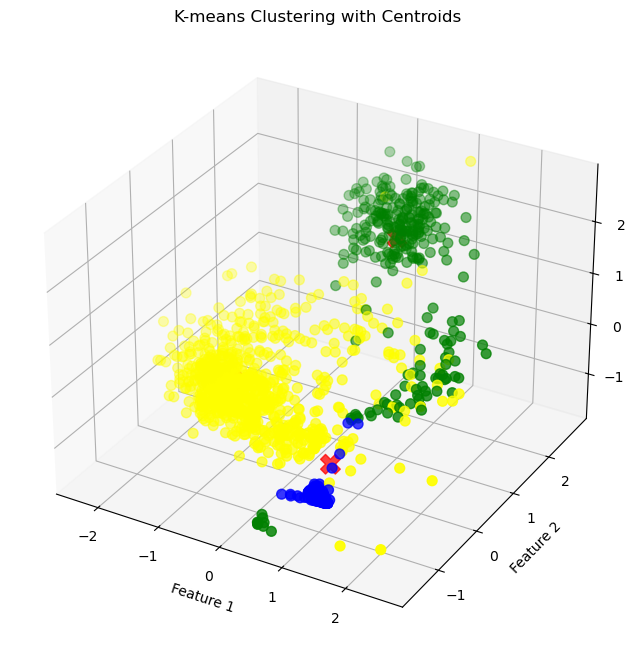

In [32]:
scaler = StandardScaler()
x = reduced_result.copy()
x = scaler.fit_transform(x)

model = PCA(n_components=2)
transformed = model.fit_transform(x)
xs = transformed[:,0]
ys = transformed[:,1]
x = pd.DataFrame(transformed)
scaler2 = StandardScaler()
x = scaler2.fit_transform(x)
x = pd.DataFrame(x)
plt.scatter(xs,ys,c=real_color_labels)  
plt.show()
clust_labels = doKmeans(x, n_clusters, 1, 0, True, True, 0)

### Explained variance for PCA

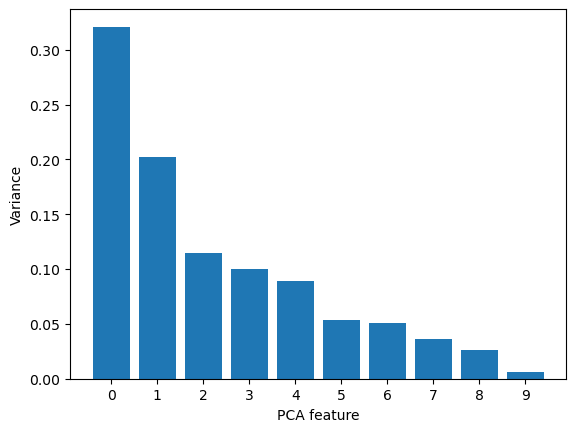

In [33]:
x = reduced_result.copy()
scaler = StandardScaler()

x = scaler.fit_transform(x)
model = PCA()
model.fit(x)

features = range(model.n_components_)
plt.bar(features, model.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.show()


### TSNE

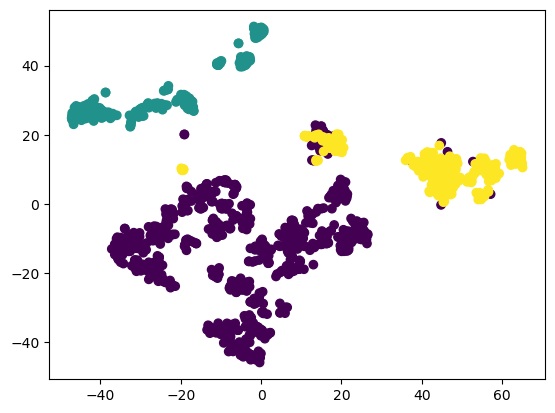

In [34]:
scaler = StandardScaler()


x = reduced_result.copy()
x = scaler.fit_transform(x)

model = TSNE(learning_rate=100)
transformed = model.fit_transform(x)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=real_labels)
plt.show()

## Other models

### DBSCAN

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

['y', 'b', 'g', 'r']


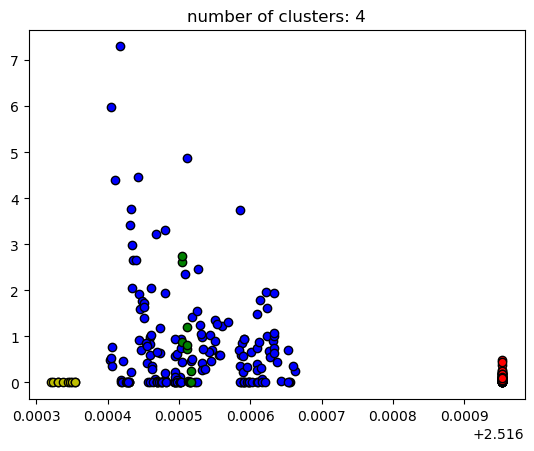

In [36]:
X = reduced_result.copy()
normalizer = Normalizer()
scaler = StandardScaler()
x = normalizer.fit_transform(x)
x = scaler.fit_transform(X)
db = DBSCAN(eps=0.3, min_samples=10).fit(x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
 
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
 
# Plot result
 
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
 
    class_member_mask = (labels == k)
 
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
 
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
 
plt.title('number of clusters: %d' % n_clusters_)
plt.show()

In [37]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)


Silhouette Coefficient:0.10


### Agglomerative Hierarchical Clustering

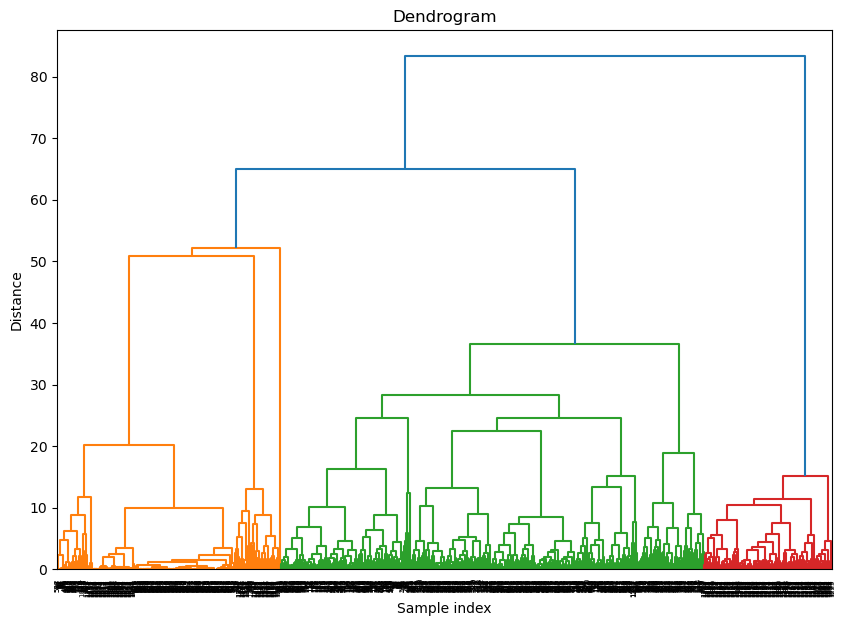

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
x = reduced_result.copy()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(x)

# Przeprowadzenie hierarchicznej klasteryzacji aglomeracyjnej
linked = linkage(df_scaled, method='ward')

# Rysowanie dendrogramu
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [39]:
max_d = 40  # Próg odcięcia, można dostosować
clusters = fcluster(linked, max_d, criterion='distance')

In [40]:
unique_labels = set(clusters)
unique_labels

{1, 2, 3, 4, 5}

In [41]:
silhouette_avg = silhouette_score(df_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.38877956283705906


### K-medoids

In [42]:
#%pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
def doKMedoids(X, nclust=n_clusters, xaxis = 2, yaxis = 6, real = False,  multidimensional = False, zaxis = 4):
    model = KMedoids(nclust, random_state=42)
    
    clust_labels = model.fit_predict(df_scaled)
    
    
    color_labels = ['yellow' if clust_labels[i] == 0 else 'blue' if clust_labels[i] == 1 else 'green' for i in range(len(clust_labels))]
    

    print(f"Model inertia: {model.inertia_}")
    print("Accuracy: ", np.mean(real_labels == clust_labels))
    print("Silhouette coefficient:" , silhouette_score(X, clust_labels))
    print("Davies Bouldin Score:" , davies_bouldin_score(X, clust_labels))
    print("Calinski Harabasz Score:" , calinski_harabasz_score(X, clust_labels))
    print()
    
        
    plt.scatter(X.iloc[:,xaxis], X.iloc[:,yaxis], c=color_labels, cmap='viridis')
    plt.scatter(model.cluster_centers_[:, xaxis], model.cluster_centers_[:, yaxis], s=300, c='red', marker='X')
    plt.title('K-medoids Clustering with Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    
    if real:
        plt.scatter(X.iloc[:,xaxis], X.iloc[:,yaxis], c=real_color_labels, cmap='viridis')
        plt.scatter(model.cluster_centers_[:, xaxis], model.cluster_centers_[:, yaxis], s=300, c='red', marker='X')
        plt.title('K-medoids Clustering with Centroids')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()
        
    if multidimensional:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        ax.scatter(X.iloc[:,xaxis], X.iloc[:,yaxis], X.iloc[:,zaxis], c=real_color_labels, s=50, cmap='viridis')
        ax.scatter(model.cluster_centers_[:, xaxis], model.cluster_centers_[:, yaxis],model.cluster_centers_[:, zaxis], s=300, c='red', marker='X')
        ax.set_title('K-medoids Clustering with Centroids')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Feature 3')
        plt.show()
    if multidimensional & real:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X.iloc[:,xaxis], X.iloc[:,yaxis], X.iloc[:,zaxis], c=color_labels, s=50, cmap='viridis')
        ax.scatter(model.cluster_centers_[:, xaxis], model.cluster_centers_[:, yaxis],model.cluster_centers_[:, zaxis], s=300, c='red', marker='X')
        ax.set_title('K-medoids Clustering with Centroids')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Feature 3')
        plt.show()
    return clust_labels

Model inertia: 3163.3038708562126
Accuracy:  0.43823529411764706
Silhouette coefficient: 0.22685108356198352
Davies Bouldin Score: 1.8746229323388939
Calinski Harabasz Score: 265.9294881499661



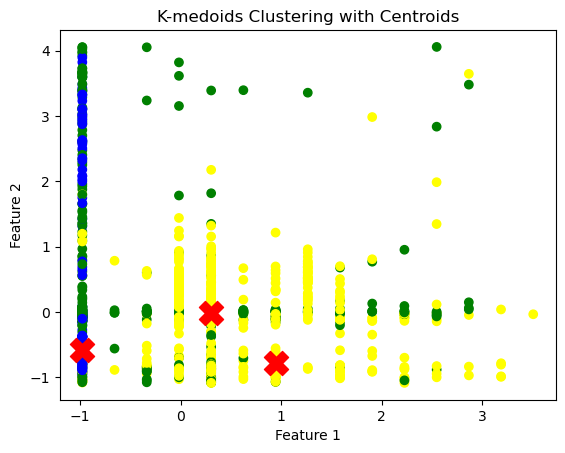

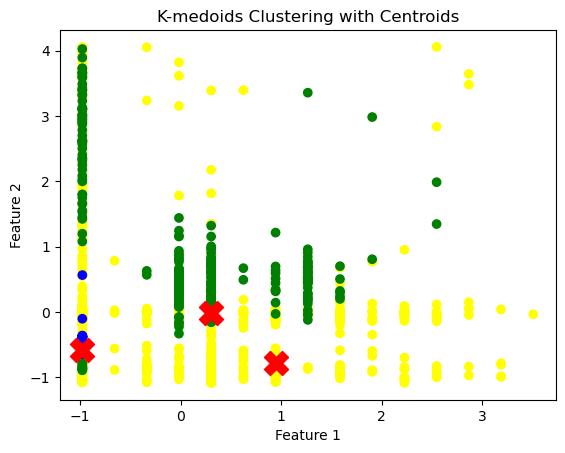

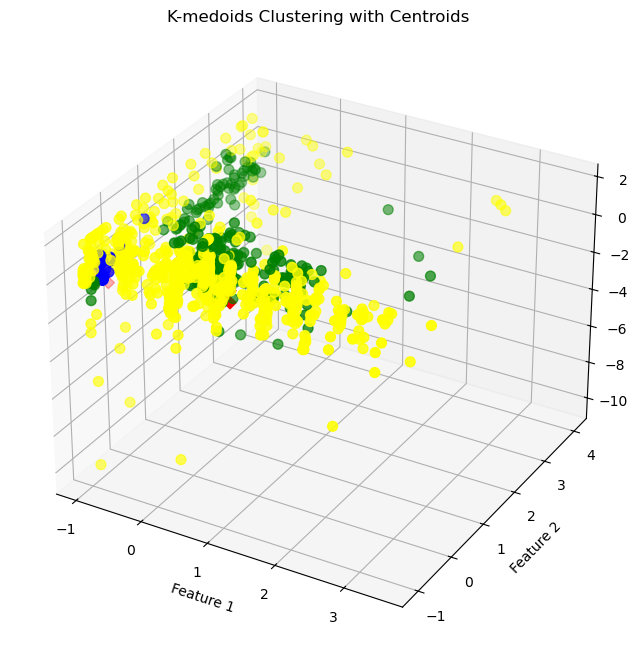

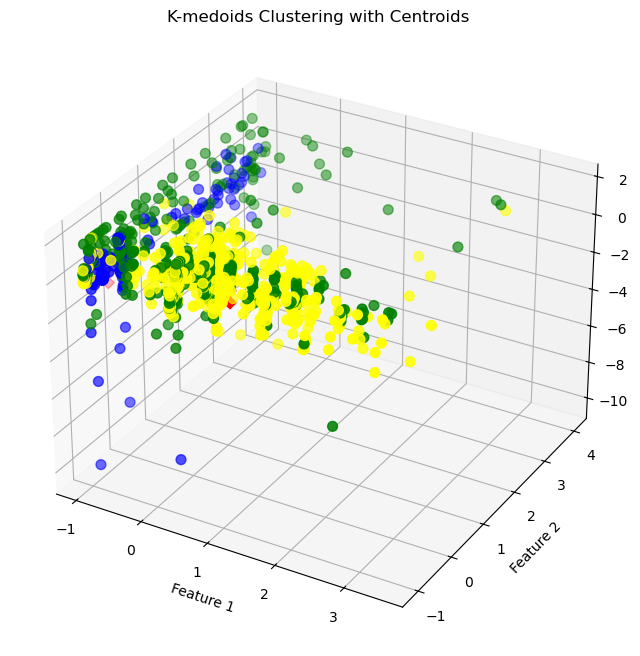

In [43]:
x = reduced_result.copy()
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x, columns=reduced_result.columns)
clust_labels = doKMedoids(x, n_clusters, 5, 6, True, True, 4)


Normalization approach seems to be the best and now we are trying to get the meaning of clusters.

# **Clusters meaning**

In [44]:
df = reduced_result.copy()

df

total_time    mean_speed  mean_acceleration  sd_acceleration  \
0       2.516545  1.945753e+00          11.015459         3.992875   
1       2.516605  3.189363e+00           9.987097         2.310040   
2       2.516626  8.628256e+00           9.768076         2.349455   
3       2.516632  1.808818e+01           9.887447         2.411183   
4       2.516498  2.172662e+01           9.841829         2.392057   
...          ...           ...                ...              ...   
1356    2.516953  1.916608e-13           9.724790         0.344378   
1357    2.516920  1.027178e-21           9.715216         0.057502   
1358    2.516907  5.407616e-28           9.703497         0.076711   
1359    2.516899  9.276274e-31           9.717226         0.096787   
1360    2.516874  9.794135e-43           9.747030         0.482260   

      mean_magnetometer  steps_per_minute  average_roll   sd_roll  \
0             44.985078        238.422122     -0.644303  0.701319   
1             50.703331          0.000000     -2.496963  0.157744   
2             54.372147          0.000000     -2.708276  0.140021   
3             54.372147         47.682776     -2.761200  0.115934   
4             54.372147          0.000000     -1.040673  2.811269   
...                 ...               ...           ...       ...   
1356          46.965620          0.000000     -2.754951  0.020464   
1357          47.155027          0.000000     -2.781184  0.010093   
1358          47.205661          0.000000     -2.805104  0.030056   
1359          47.345006          0.000000     -2.792382  0.016608   
1360          47.180419          0.000000     -2.711286  0.013943   

      median_pitch   min_yaw  
0        -0.577149 -2.518292  
1         0.463072  0.154463  
2         0.831813  0.573503  
3         0.909612  0.730423  
4         1.156837  0.880115  
...            ...       ...  
1356     -0.252271  2.492903  
1357     -0.281333  2.757857  
1358     -0.275647  2.717815  
1359     -0.260294  2.725673  
1360     -0.245037  2.577463  

[1360 rows x 10 columns]

In [45]:
clust_labels_norm

array([2, 1, 1, ..., 1, 1, 1])

In [46]:
df = reduced_result.copy()
df['cluster'] = clust_labels_norm

In [47]:
unique_labels = np.unique(clust_labels_norm)

for label in unique_labels:
    cluster_data = df[clust_labels_norm == label]
    cluster_mean = cluster_data.mean()
    cluster_median = cluster_data.median()
    cluster_std = cluster_data.std()
    
    print(f"Cluster {label} Summary:")
    print("Mean:")
    print(cluster_mean)
    print("Median:")
    print(cluster_median)
    print("Standard Deviation:")
    print(cluster_std)
    print("\n")

Cluster 0 Summary:
Mean:
total_time            2.516582
mean_speed           15.311592
mean_acceleration    10.354075
sd_acceleration       3.639561
mean_magnetometer    49.328472
steps_per_minute     86.576315
average_roll         -1.863494
sd_roll               0.766162
median_pitch          0.810029
min_yaw              -1.149973
cluster               0.000000
dtype: float64
Median:
total_time            2.516562
mean_speed           17.242190
mean_acceleration    10.009712
sd_acceleration       3.084239
mean_magnetometer    49.219550
steps_per_minute     95.359679
average_roll         -1.791625
sd_roll               0.119247
median_pitch          0.804628
min_yaw              -1.390891
cluster               0.000000
dtype: float64
Standard Deviation:
total_time            0.000221
mean_speed            8.557037
mean_acceleration     0.774975
sd_acceleration       1.463861
mean_magnetometer     2.746790
steps_per_minute     16.128497
average_roll          0.850998
sd_roll           

Based on the provided data, we can attempt to characterize the activity groups represented by the three clusters. Here is the analysis of each cluster:

### Cluster 0
**Mean Values:**
- Total time: 2.52 minutes
- Mean speed: 15.31 m/s
- Mean acceleration: 10.35 m/s²
- Standard deviation of acceleration: 3.64 m/s²
- Mean magnetometer value: 49.33
- Steps per minute: 86.58
- Average roll: -1.86
- Standard deviation of roll: 0.77
- Median pitch: 0.81
- Minimum yaw: -1.15

**Median Values:**
- Total time: 2.52 minutes
- Mean speed: 17.24 m/s
- Mean acceleration: 10.01 m/s²
- Standard deviation of acceleration: 3.08 m/s²
- Mean magnetometer value: 49.22
- Steps per minute: 95.36
- Average roll: -1.79
- Standard deviation of roll: 0.12
- Median pitch: 0.80
- Minimum yaw: -1.39

**Standard Deviation:**
- Total time: 0.00022
- Mean speed: 8.56
- Mean acceleration: 0.77
- Standard deviation of acceleration: 1.46
- Mean magnetometer value: 2.75
- Steps per minute: 16.13
- Average roll: 0.85
- Standard deviation of roll: 0.86
- Median pitch: 0.39
- Minimum yaw: 1.74

**Characteristics:**
- High mean speed and acceleration, suggesting intense activity.
- Relatively high number of steps per minute, indicating vigorous movement, such as running.
- Moderate variability in acceleration and roll.

### Cluster 1
**Mean Values:**
- Total time: 2.51 minutes
- Mean speed: 5.06 km/h
- Mean acceleration: 9.80 m/s²
- Standard deviation of acceleration: 0.83 m/s²
- Mean magnetometer value: 48.00
- Steps per minute: 0.26
- Average roll: -1.64
- Standard deviation of roll: 0.34
- Median pitch: 0.43
- Minimum yaw: -1.44

**Median Values:**
- Total time: 2.52 minutes
- Mean speed: 0.66 km/h
- Mean acceleration: 9.72 m/s²
- Standard deviation of acceleration: 0.18 m/s²
- Mean magnetometer value: 47.42
- Steps per minute: 0.00
- Average roll: -2.45
- Standard deviation of roll: 0.02
- Median pitch: 0.33
- Minimum yaw: -2.40

**Standard Deviation:**
- Total time: 0.08
- Mean speed: 7.52 km/h
- Mean acceleration: 0.18
- Standard deviation of acceleration: 1.08
- Mean magnetometer value: 3.36
- Steps per minute: 2.47
- Average roll: 1.52
- Standard deviation of roll: 0.74
- Median pitch: 0.54
- Minimum yaw: 1.57

**Characteristics:**
- Very low number of steps per minute, indicating little to no movement, such as sitting or standing still.
- Low mean speed and moderate mean acceleration.
- High variability in roll and pitch, suggesting unstable posture or slight movements.

### Cluster 2
**Mean Values:**
- Total time: 2.52 minutes
- Mean speed: 15.14 km/h
- Mean acceleration: 10.28 m/s²
- Standard deviation of acceleration: 3.31 m/s²
- Mean magnetometer value: 48.99
- Steps per minute: 187.75
- Average roll: -1.86
- Standard deviation of roll: 0.64
- Median pitch: 0.78
- Minimum yaw: -1.06

**Median Values:**
- Total time: 2.52 minutes
- Mean speed: 17.33 km/h
- Mean acceleration: 9.95 m/s²
- Standard deviation of acceleration: 2.88 m/s²
- Mean magnetometer value: 49.06
- Steps per minute: 190.72
- Average roll: -1.81
- Standard deviation of roll: 0.10
- Median pitch: 0.65
- Minimum yaw: -1.37

**Standard Deviation:**
- Total time: 0.00021
- Mean speed: 8.64
- Mean acceleration: 0.73
- Standard deviation of acceleration: 1.47
- Mean magnetometer value: 3.36
- Steps per minute: 44.67
- Average roll: 0.90
- Standard deviation of roll: 0.82
- Median pitch: 0.38
- Minimum yaw: 1.74

**Characteristics:**
- High mean speed and acceleration, similar to Cluster 0, suggesting intense activity.
- Higher number of steps per minute than Cluster 0, indicating very vigorous movement, such as sprinting or fast running.
- Moderate variability in acceleration and roll.

### Summary
1. **Cluster 0:** High-intensity activity (likely running).
2. **Cluster 1:** Low to no physical activity (sitting or standing still).
3. **Cluster 2:** Very high-intensity activity (likely cycling).

Each cluster represents different levels of intensity and types of physical activity, ranging from high-intensity running, to no movement, to very high-intensity sprinting or fast running.